In [1]:
!pip install --upgrade pip
!pip install tensorflow

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\vdako\anaconda3\envs\sam-model-env\python.exe -m pip install --upgrade pip


In [2]:
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print("GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.get_logger().setLevel('ERROR')
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Tensor Flow Version: 2.13.0

Python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
GPUs Available:  0


False

In [4]:
import pickle
dict = pickle.load(open('california-housing-dataset.pkl', 'rb'))
x_train, y_train = dict['x_train'], dict['y_train']
x_test, y_test = dict['x_test'], dict['y_test']

## Dataset Exploration


In [5]:
print(x_train.shape, y_train.shape)
print(x_train[1,:], y_train[1])

(15480, 8) (15480,)
[   2.7639        9.            8.75862069    1.72413793   66.
    2.27586207   39.04       -122.69      ] 1.125


In [6]:
features = ['MedInc', 'HouseAge' ,'AveRooms' ,'AveBedrms' ,'Population', 'AveOccup' ,'Latitude' ,'Longitude' ]

def show_dataset_min_and_max(x, y, features):
    for i in range(len(features)):
        a = x[:,i]
        print('{}; [{}, {}]'.format(features[i], min(a), max(a),))
        print('Datatype: {}'.format(a.dtype))
    print('\nMax Price: {}; Min Price: {}'.format(max(y), min(y[:])))
    

#### Non-Normalized Values


In [7]:
show_dataset_min_and_max(x_train, y_train, features)

MedInc; [0.4999, 15.0001]
Datatype: float64
HouseAge; [1.0, 52.0]
Datatype: float64
AveRooms; [0.8461538461538461, 141.9090909090909]
Datatype: float64
AveBedrms; [0.3333333333333333, 34.06666666666667]
Datatype: float64
Population; [5.0, 35682.0]
Datatype: float64
AveOccup; [0.6923076923076923, 1243.3333333333333]
Datatype: float64
Latitude; [32.54, 41.95]
Datatype: float64
Longitude; [-124.35, -114.31]
Datatype: float64

Max Price: 5.00001; Min Price: 0.14999


In [8]:
show_dataset_min_and_max(x_test, y_test, features)

MedInc; [0.4999, 15.0001]
Datatype: float64
HouseAge; [1.0, 52.0]
Datatype: float64
AveRooms; [1.3784860557768925, 52.848214285714285]
Datatype: float64
AveBedrms; [0.5714285714285714, 11.410714285714286]
Datatype: float64
Population; [3.0, 13251.0]
Datatype: float64
AveOccup; [0.75, 599.7142857142857]
Datatype: float64
Latitude; [32.55, 41.81]
Datatype: float64
Longitude; [-124.3, -114.56]
Datatype: float64

Max Price: 5.00001; Min Price: 0.225


In [9]:
print(len(y_train[np.where(y_train[np.where(y_train >= 4.8)] < 4.999)]))
print(len(y_train[y_train >=5]))
print(len(y_test[y_test >=5]))

66
751
241


In [10]:
indices_to_remove_train = np.where(y_train >= 5)[0]
indices_to_remove_test = np.where(y_test >= 5)[0]

x_train_no_5s = np.delete(x_train, indices_to_remove_train, axis=0)
y_train_no_5s = np.delete(y_train, indices_to_remove_train)
x_test_no_5s = np.delete(x_test, indices_to_remove_test, axis=0)
y_test_no_5s = np.delete(y_test, indices_to_remove_test)


In [11]:
show_dataset_min_and_max(x_train_no_5s, y_train_no_5s, features)

MedInc; [0.4999, 15.0001]
Datatype: float64
HouseAge; [1.0, 52.0]
Datatype: float64
AveRooms; [0.8461538461538461, 132.53333333333333]
Datatype: float64
AveBedrms; [0.3333333333333333, 34.06666666666667]
Datatype: float64
Population; [5.0, 35682.0]
Datatype: float64
AveOccup; [0.6923076923076923, 1243.3333333333333]
Datatype: float64
Latitude; [32.54, 41.95]
Datatype: float64
Longitude; [-124.35, -114.31]
Datatype: float64

Max Price: 4.99; Min Price: 0.14999


#### Normalized Values


In [12]:
def normalize(x):
    mean = np.mean(x, axis = 0)
    std = np.std(x, axis = 0)

    normX = (x - mean) / std

    col_max = np.max(normX, axis=0)
    col_min = np.min(normX, axis=0)
    normX = np.divide(normX - col_min, col_max - col_min)

    return normX


x_train_n = normalize(x_train_no_5s)
y_train_n = normalize(y_train_no_5s)
x_test_n = normalize(x_test_no_5s)
y_test_n = normalize(y_test_no_5s)


In [13]:
show_dataset_min_and_max(x_train_n, y_train_n, features)

MedInc; [0.0, 1.0]
Datatype: float64
HouseAge; [0.0, 1.0]
Datatype: float64
AveRooms; [0.0, 1.0]
Datatype: float64
AveBedrms; [0.0, 1.0]
Datatype: float64
Population; [0.0, 1.0]
Datatype: float64
AveOccup; [0.0, 1.0]
Datatype: float64
Latitude; [0.0, 1.0]
Datatype: float64
Longitude; [0.0, 1.0]
Datatype: float64

Max Price: 1.0; Min Price: 0.0


In [14]:
show_dataset_min_and_max(x_test_n, y_test_n, features)

MedInc; [0.0, 1.0]
Datatype: float64
HouseAge; [0.0, 1.0]
Datatype: float64
AveRooms; [0.0, 1.0]
Datatype: float64
AveBedrms; [0.0, 1.0]
Datatype: float64
Population; [0.0, 1.0]
Datatype: float64
AveOccup; [0.0, 1.0]
Datatype: float64
Latitude; [0.0, 1.0]
Datatype: float64
Longitude; [0.0, 1.0]
Datatype: float64

Max Price: 1.0; Min Price: 0.0


In [15]:
print(y_train_n.shape)
print(y_test_n.shape)

(14729,)
(4919,)


## Neural Network Design Experiments


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization
tf.random.set_seed(1234)

In [17]:
def initialize_sequential_model(layer_sizes, activation):
    """
    Function  to initialize a sequence of layers of a given size with a given activation function.
    The input layer has been fixed to a size of 8. 
    """
    model = Sequential()
    for size in layer_sizes:
        if not model.layers : 
            model.add(Dense(size, activation=activation, input_shape=(8,))) # for first layer
        elif size == 1:
            model.add(Dense(size, activation='linear')) # for last layer
        else:
            model.add(Dense(size, activation=activation)) # for every subsequent layer
    
    return model

def visualize_and_plot(labels_predicted, ground_truth, error_functions, history, save_filename):
    """ 
    Function to visualize the predicted regression values vs the actual ones
    and plot the error on each epoch in a single plot.
    """
    n = len(error_functions) if type(error_functions) is list else 1
    fig, ax = plt.subplots(1, n + 1, figsize=(12, 3))

    # Plot predicted vs actual values
    ax[0].plot(labels_predicted, ground_truth, '.', alpha=0.1)
    ax[0].plot(ground_truth, ground_truth)
    ax[0].set_title('Predicted vs Actual')
    ax[0].set_xlabel('Predicted values')
    ax[0].set_ylabel('Actual values')
    ax[0].legend(['pred', 'gr_tr'], loc='lower right')


    if type(error_functions) is list:
        for i in range(1, len(error_functions) + 1):
            error = error_functions[i - 1];
            # Plot training history
            ax[i].plot(history[error])
            ax[i].plot(history['val_{}'.format(error)])
            ax[i].set_title(error.upper())
            ax[i].set_ylabel(error)
            ax[i].set_xlabel('Epochs')
            ax[i].legend(['train', 'val'], loc='upper right')
    else:
        ax[1].plot(history[error_functions])
        ax[1].set_title(error_functions.upper())
        ax[1].set_ylabel(error_functions)
        ax[1].set_xlabel('Epochs')
        ax[1].legend(['train'], loc='upper right')

    plt.tight_layout()
    plt.savefig(f'figures\\{save_filename}.png')
    # plt.show()

def evaluate_model_on_final_epoch(history):
    evaluation_results = {}
    for error_function in history.keys():
        evaluation_results[error_function.upper()] = history[error_function][-1]
    print(evaluation_results)
    return evaluation_results

        

In [18]:
from tensorflow.keras.models import load_model
import pickle
import os

def create_and_train_model(*args):
    layer_sizes, activation_function, epochs, optimizer, loss_function, error_functions, model_name, dataset, load_from_file = args
    x_train_n, y_train_n = dataset

    model_file = '{}/{}.h5'.format('saved_models', model_name)
    history_file = '{}/{}_history.pkl'.format('saved_models', model_name)

    if load_from_file and os.path.exists(model_file) and os.path.exists(history_file):
        model = load_model(model_file)
        with open(history_file, 'rb') as file:
            history = pickle.load(file)
        print(f"Model and history loaded from '{model_name}'")
        print(history)
    else:
        model = initialize_sequential_model(layer_sizes, activation_function)

        model.compile(loss=loss_function, 
                    optimizer=optimizer,
                    metrics=error_functions
                    )
        history = model.fit(x_train_n[:,:],  # training data
                            y_train_n[:],     # Labels
                            epochs=epochs,
                            batch_size=128,
                            verbose=0,
                            validation_split=0.2
                            ).history
        print(f"New model created and trained: {model_file}")

        model.save(model_file)
        with open(history_file, 'wb') as file:
            pickle.dump(history, file)
        print(f"Model and history saved as '{model_file}'")

    return model, history



### Evaluating Loss and Activation Functions

In [19]:
import json

def evaluate_architecture(layer_sizes, activation_functions, num_epochs, error_functions, dataset, file_name, load_from_file):

    x_train_n, y_train_n  = dataset 
    print("LAYER SIZES", layer_sizes)
    table = {}
    
    for activation_function in activation_functions:
        loss_function_table = {}
        print("====================================================================================")
        print('ACTIVATION FUNCTION: {}'. format(activation_function.upper()))
        for loss_function in error_functions:
            optimizer = tf.keras.optimizers.legacy.Adam()
            model_name = '{}-{}-{}'.format(file_name, activation_function, loss_function)
            m, h= create_and_train_model(layer_sizes, activation_function, num_epochs, optimizer, 
                                         loss_function, error_functions, model_name, 
                                         dataset, load_from_file)
            labels_predicted = m.predict(x_train_n)
            visualize_and_plot(labels_predicted, y_train_n, error_functions, h, model_name)
            metric_table = evaluate_model_on_final_epoch(h)
            loss_function_table[loss_function] = metric_table
        table[activation_function] = loss_function_table

    with open('json_outputs\\{}.json'.format(file_name), 'w') as file:
        json.dump(table, file, indent=4)

        

In [20]:
l = [16, 32, 64, 32, 16, 8, 4, 2, 1]
error_functions = ['mean_absolute_error', 'mean_squared_error', 'mean_absolute_percentage_error']
activation_functions = ['linear', 'relu', 'elu']

LAYER SIZES [16, 32, 64, 32, 16, 8, 4, 2, 1]
ACTIVATION FUNCTION: LINEAR
Model and history loaded from 'experiment_activation_loss-linear-mean_absolute_error'
{'loss': [0.1585983783006668, 0.10653914511203766, 0.1048172265291214, 0.10293992608785629, 0.10025999695062637, 0.10188524425029755, 0.10143567621707916, 0.10083438456058502, 0.1004868671298027, 0.10209323465824127, 0.10096340626478195, 0.10142623633146286, 0.10019621253013611, 0.10033682733774185, 0.09919238835573196, 0.10033771395683289, 0.10110051184892654, 0.09921713173389435, 0.10020014643669128, 0.09966636449098587, 0.10011116415262222, 0.09884360432624817, 0.09983260929584503, 0.09898276627063751, 0.09976276010274887], 'mean_absolute_error': [0.1585983783006668, 0.10653914511203766, 0.1048172265291214, 0.10293992608785629, 0.10025999695062637, 0.10188524425029755, 0.10143567621707916, 0.10083438456058502, 0.1004868671298027, 0.10209323465824127, 0.10096340626478195, 0.10142623633146286, 0.10019621253013611, 0.100336827337

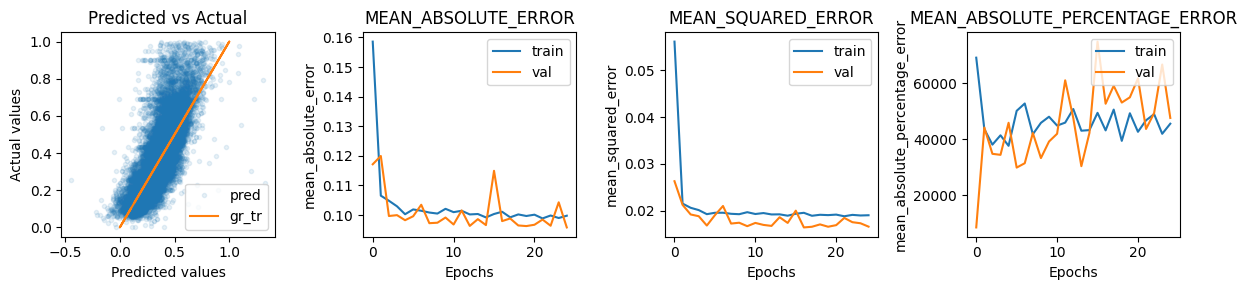

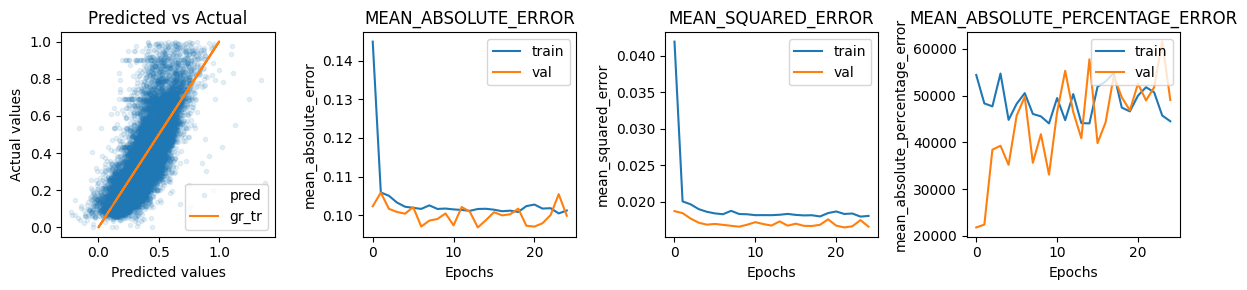

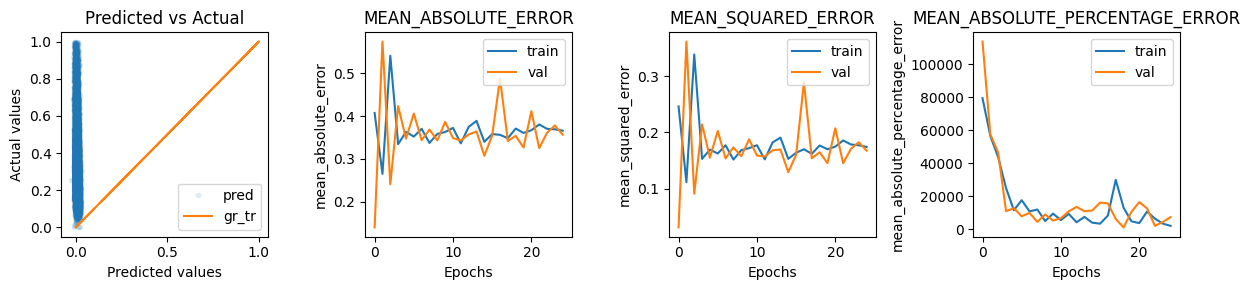

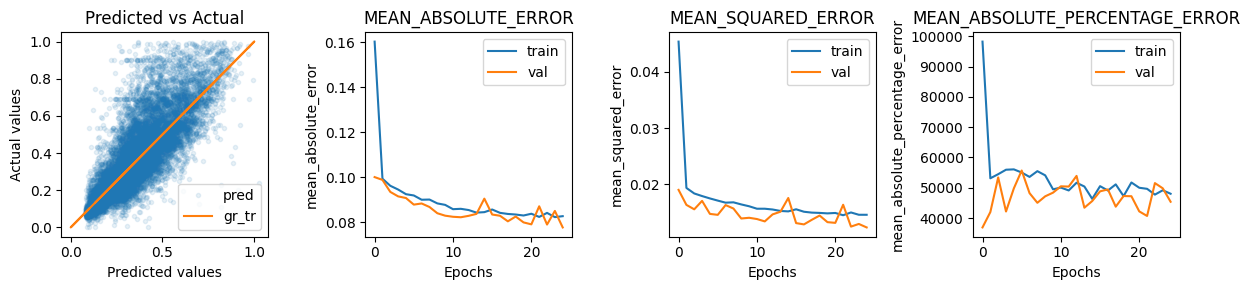

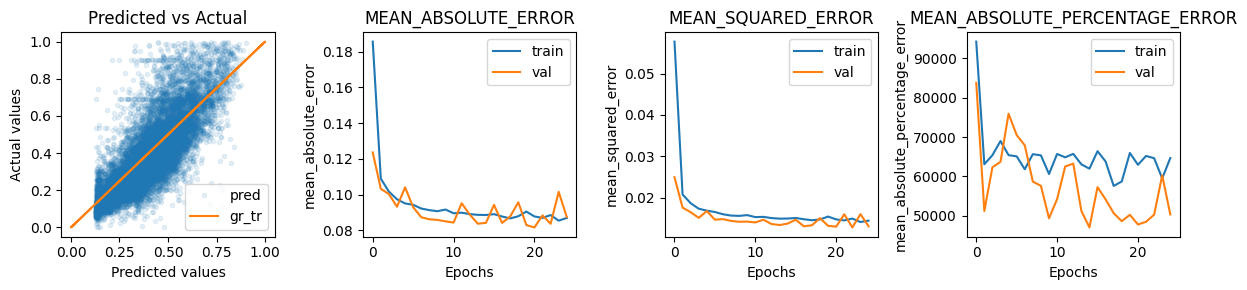

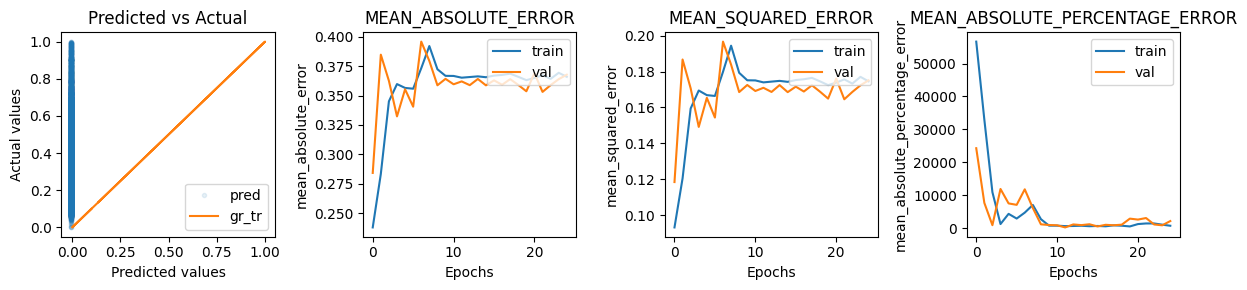

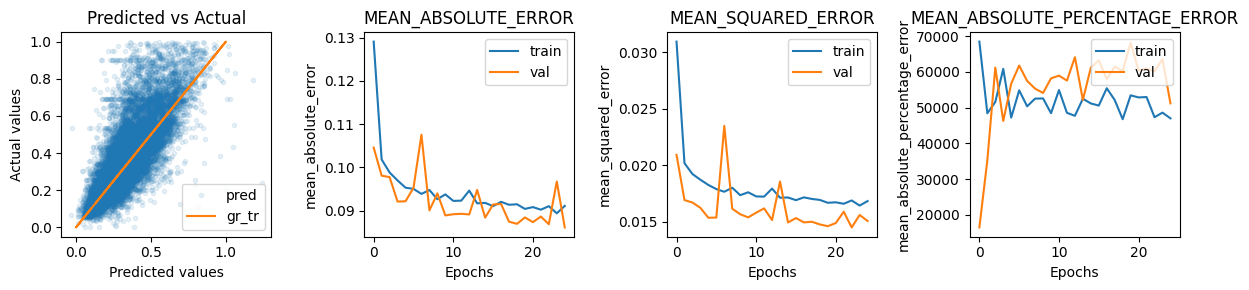

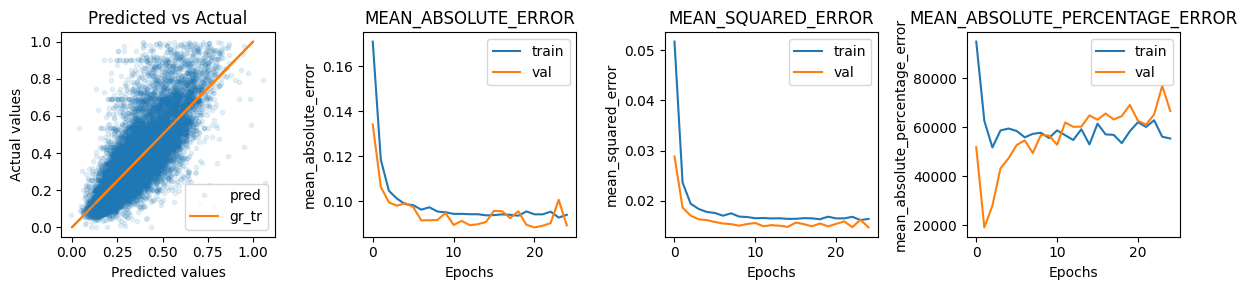

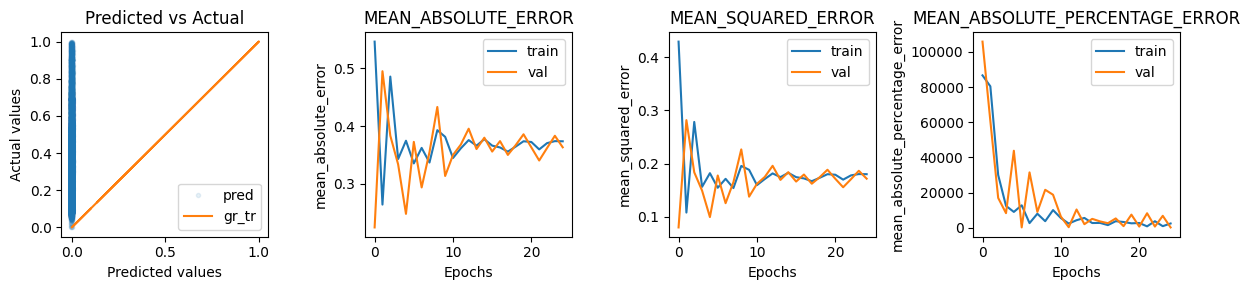

In [22]:
evaluate_architecture(l, activation_functions, 25, error_functions, [x_train_n, y_train_n], 'experiment_activation_loss', True)

LAYER SIZES [16, 32, 64, 32, 16, 8, 4, 2, 1]
ACTIVATION FUNCTION: LINEAR
Model and history loaded from 'experiment_activation_loss-linear-mean_absolute_error'
{'loss': [0.1585983783006668, 0.10653914511203766, 0.1048172265291214, 0.10293992608785629, 0.10025999695062637, 0.10188524425029755, 0.10143567621707916, 0.10083438456058502, 0.1004868671298027, 0.10209323465824127, 0.10096340626478195, 0.10142623633146286, 0.10019621253013611, 0.10033682733774185, 0.09919238835573196, 0.10033771395683289, 0.10110051184892654, 0.09921713173389435, 0.10020014643669128, 0.09966636449098587, 0.10011116415262222, 0.09884360432624817, 0.09983260929584503, 0.09898276627063751, 0.09976276010274887], 'mean_absolute_error': [0.1585983783006668, 0.10653914511203766, 0.1048172265291214, 0.10293992608785629, 0.10025999695062637, 0.10188524425029755, 0.10143567621707916, 0.10083438456058502, 0.1004868671298027, 0.10209323465824127, 0.10096340626478195, 0.10142623633146286, 0.10019621253013611, 0.100336827337

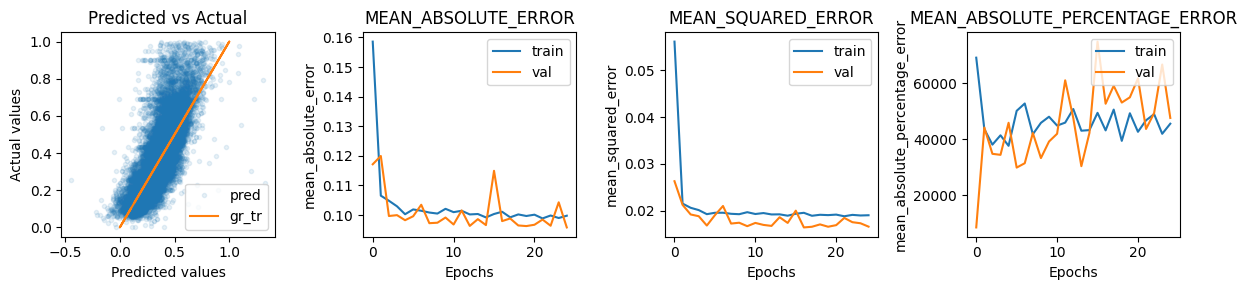

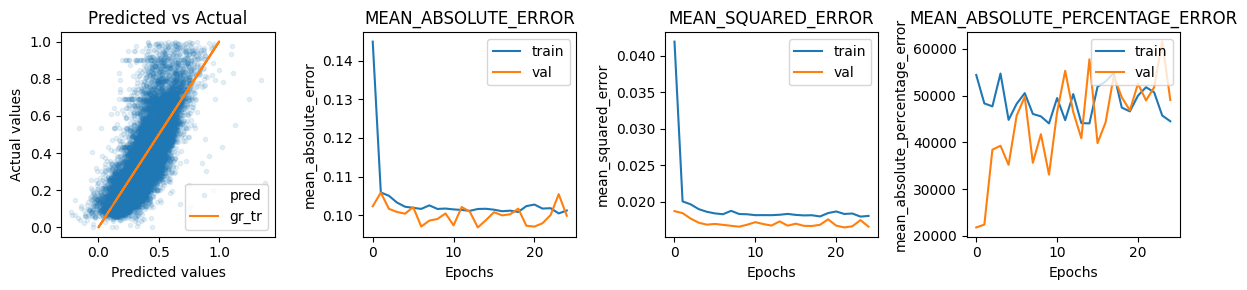

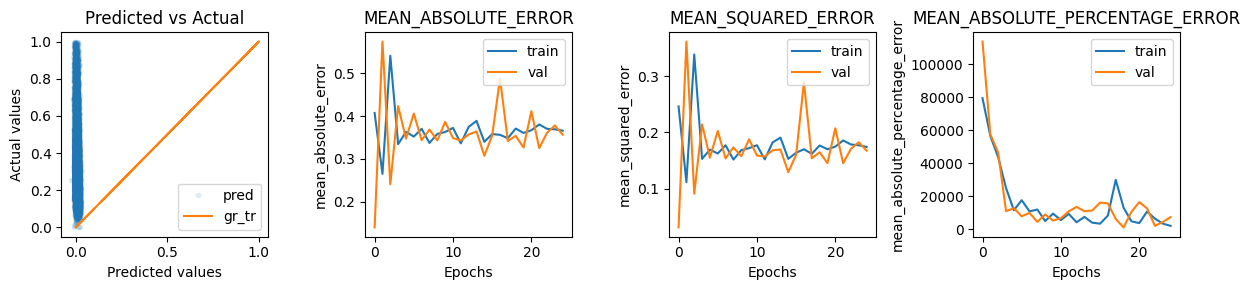

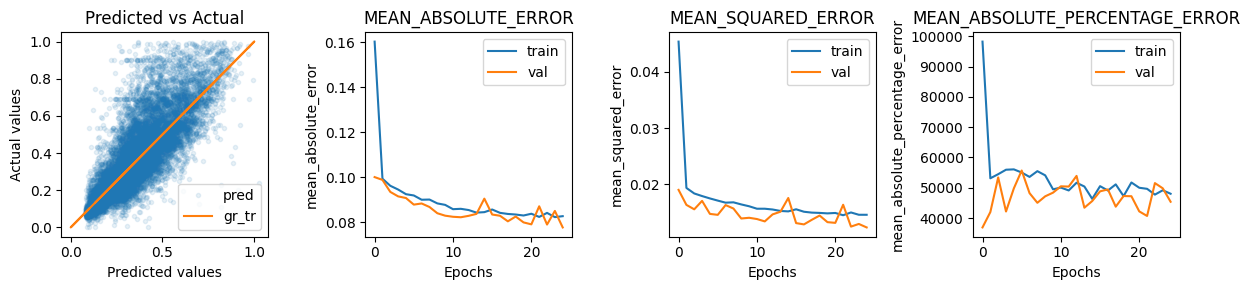

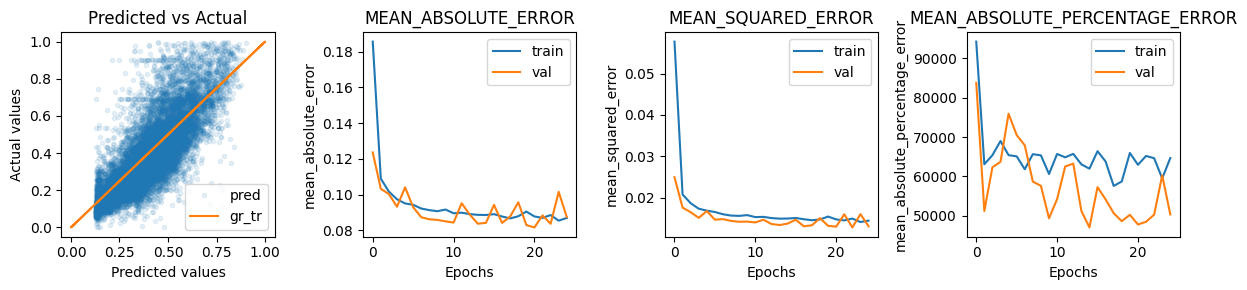

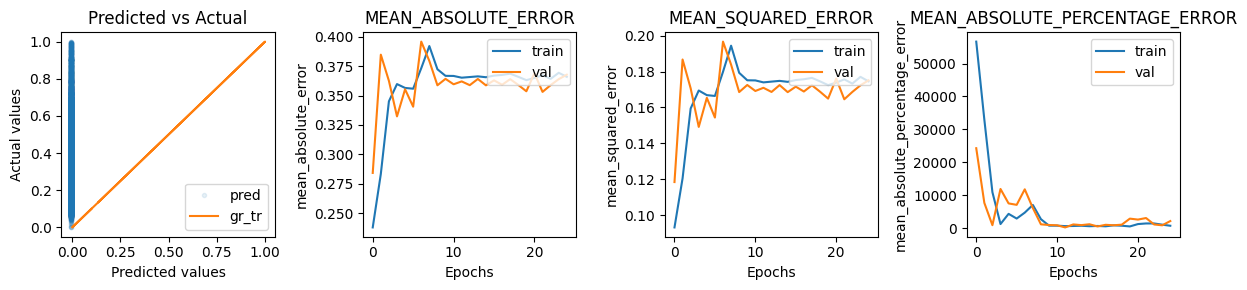

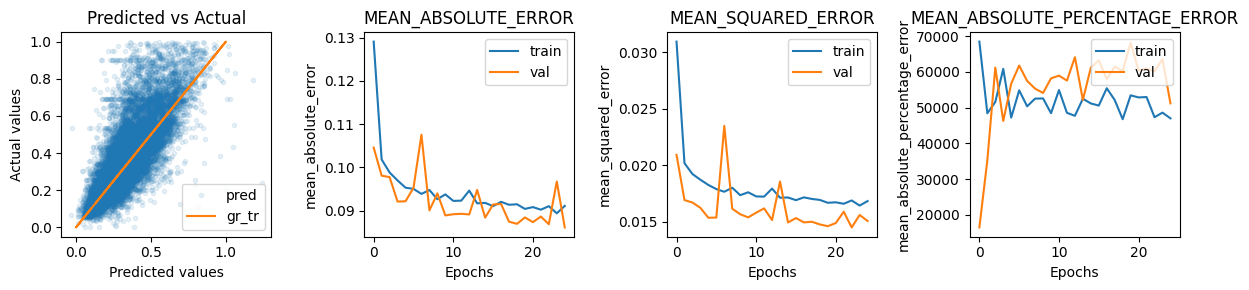

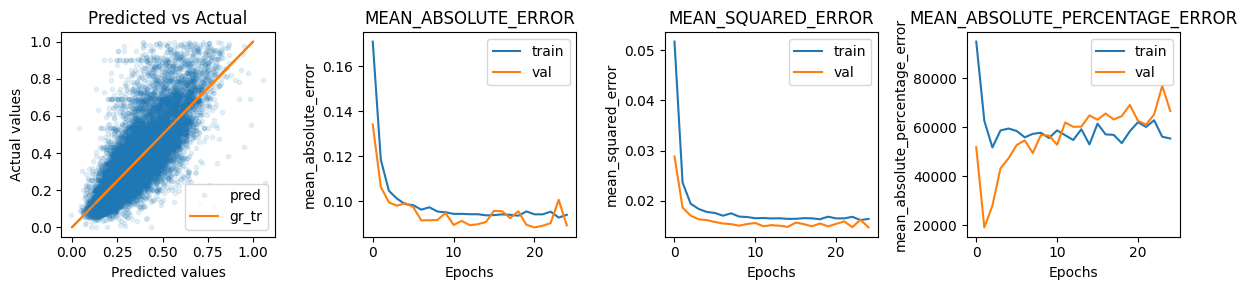

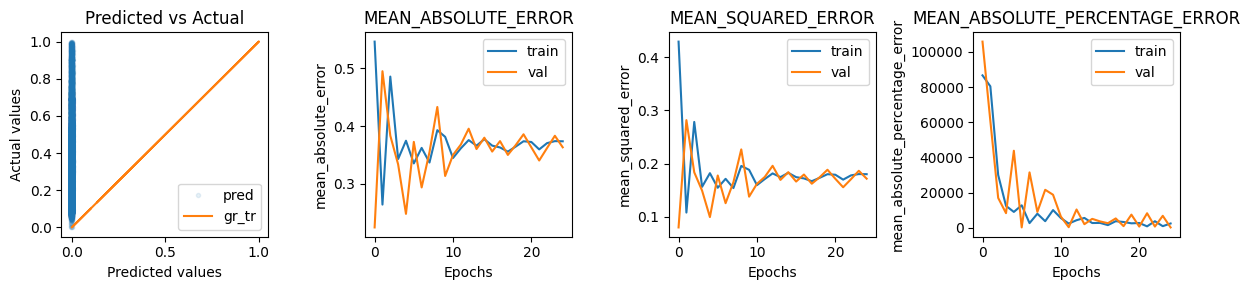

In [23]:
evaluate_architecture(l, activation_functions, 25, error_functions, [x_train_n, y_train_n], 'experiment_activation_loss', True)

In [24]:
from latex_export_functions import save_latex_table_from_json_activation_loss

save_latex_table_from_json_activation_loss('experiment_activation_loss')

### Evaluating Neural Network Layer Structures

In [25]:
activation_function = ['relu']
error_functions = ['mean_squared_error']
load_from_file = True

In [26]:
l1 = [16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
l2 = [16, 32, 16, 8, 1]
l3 = [16, 32, 64, 32, 16, 8, 4, 2, 1]
l4 = [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]

LAYER SIZES [16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
ACTIVATION FUNCTION: RELU


Model and history loaded from 'experiment_size_[16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]-relu-mean_squared_error'
{'loss': [0.044932782649993896, 0.019972627982497215, 0.017957288771867752, 0.017548799514770508, 0.018185827881097794, 0.01675969734787941, 0.01649085246026516, 0.015935171395540237, 0.01591593213379383, 0.015465917997062206, 0.014929138123989105, 0.015209917910397053, 0.014781744219362736, 0.014927120879292488, 0.015207440592348576, 0.015407434664666653, 0.014678982086479664, 0.01423555240035057, 0.014215818606317043, 0.01526564173400402, 0.014608640223741531, 0.015329153276979923, 0.014693792909383774, 0.013711336068809032, 0.013969199731945992, 0.013695654459297657, 0.013286600820720196, 0.013832556083798409, 0.01362526509910822, 0.01279410906136036, 0.012846448458731174, 0.013825785368680954, 0.014262418262660503, 0.012872670777142048, 0.013380799442529678, 0.013649244792759418, 0.013350429013371468, 0.013350126333534718, 0.01283772289752

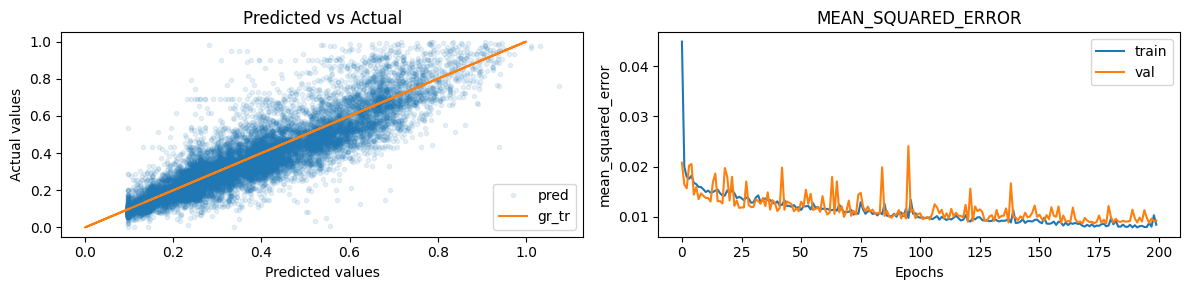

In [27]:
evaluate_architecture(l1, activation_function, 200, error_functions, [x_train_n, y_train_n], 'experiment_size_{}'.format(l1), load_from_file)

LAYER SIZES [16, 32, 16, 8, 1]
ACTIVATION FUNCTION: RELU
Model and history loaded from 'experiment_size_[16, 32, 16, 8, 1]-relu-mean_squared_error'
{'loss': [0.04950764402747154, 0.021302396431565285, 0.01931697130203247, 0.01846325956285, 0.017916664481163025, 0.017481539398431778, 0.01712888479232788, 0.01693422719836235, 0.016632262617349625, 0.01635660044848919, 0.01623491384088993, 0.015988225117325783, 0.015855103731155396, 0.015916354954242706, 0.015853988006711006, 0.015670381486415863, 0.015460764057934284, 0.015435058623552322, 0.015304483473300934, 0.015707045793533325, 0.015233208425343037, 0.015444472432136536, 0.015379115007817745, 0.01498353760689497, 0.015064375475049019, 0.01492882240563631, 0.014856233261525631, 0.01493394747376442, 0.014904042705893517, 0.014850478619337082, 0.015033924020826817, 0.014807037077844143, 0.014445236884057522, 0.014528737403452396, 0.014409649185836315, 0.0144936703145504, 0.014366649091243744, 0.01444953866302967, 0.014220429584383965, 

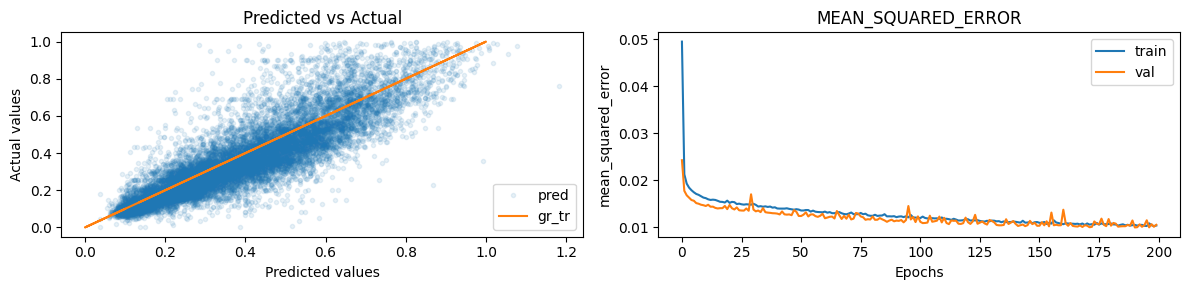

In [28]:
evaluate_architecture(l2, activation_function, 200, error_functions, [x_train_n, y_train_n], 'experiment_size_{}'.format(l2), load_from_file)

LAYER SIZES [16, 32, 64, 32, 16, 8, 4, 2, 1]
ACTIVATION FUNCTION: RELU
Model and history loaded from 'experiment_size_[16, 32, 64, 32, 16, 8, 4, 2, 1]-relu-mean_squared_error'
{'loss': [0.05330590903759003, 0.025350522249937057, 0.01927468739449978, 0.01802031695842743, 0.01727817952632904, 0.016835995018482208, 0.016141314059495926, 0.015951519832015038, 0.015833264216780663, 0.015946147963404655, 0.015227645635604858, 0.015300680883228779, 0.015073461458086967, 0.014872145839035511, 0.014943607151508331, 0.014847233891487122, 0.014858637005090714, 0.014708371832966805, 0.014557554386556149, 0.01518452912569046, 0.015089618042111397, 0.014692047610878944, 0.0148704182356596, 0.014126010239124298, 0.014501524157822132, 0.014058475382626057, 0.01409424189478159, 0.014068590477108955, 0.014281307347118855, 0.013775927014648914, 0.013816623017191887, 0.014357857406139374, 0.013855204917490482, 0.013978071510791779, 0.013513081707060337, 0.013757215812802315, 0.013453762046992779, 0.013888

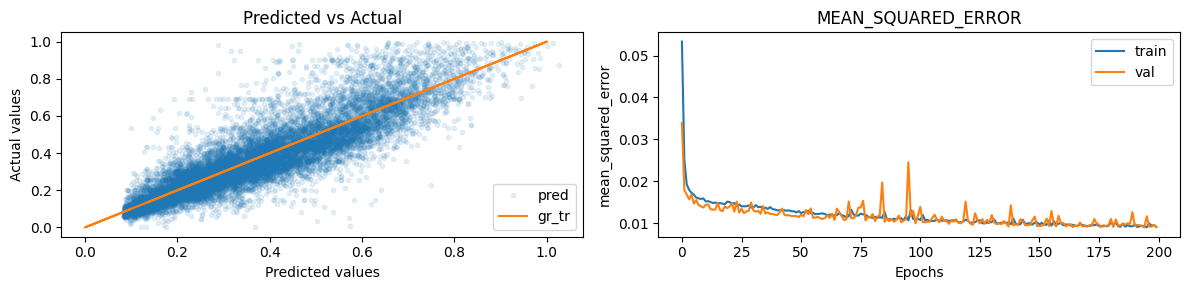

In [29]:
evaluate_architecture(l3, activation_function, 200, error_functions, [x_train_n, y_train_n], 'experiment_size_{}'.format(l3), load_from_file)

LAYER SIZES [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]
ACTIVATION FUNCTION: LINEAR
Model and history loaded from 'experiment_size_[16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]-linear-mean_squared_error'
{'loss': [0.09270273894071579, 0.020542873069643974, 0.019869031384587288, 0.019163018092513084, 0.018669940531253815, 0.01859092526137829, 0.018210232257843018, 0.019208373501896858, 0.01833220385015011, 0.01835825853049755, 0.01821468397974968, 0.018171431496739388, 0.018226683139801025, 0.01830621063709259, 0.018258918076753616, 0.018200181424617767, 0.01836889423429966, 0.018285678699612617, 0.018085462972521782, 0.018725374713540077, 0.019038556143641472, 0.01854807324707508, 0.01869538053870201, 0.017968567088246346, 0.018202457576990128, 0.018010534346103668, 0.017940586432814598, 0.018224583938717842, 0.018287617713212967, 0.018444407731294632, 0.01842362806200981, 0.018434226512908936, 0.01805179752409458, 0.018233835697174072, 0.018088245764374733, 0.01806061342358589

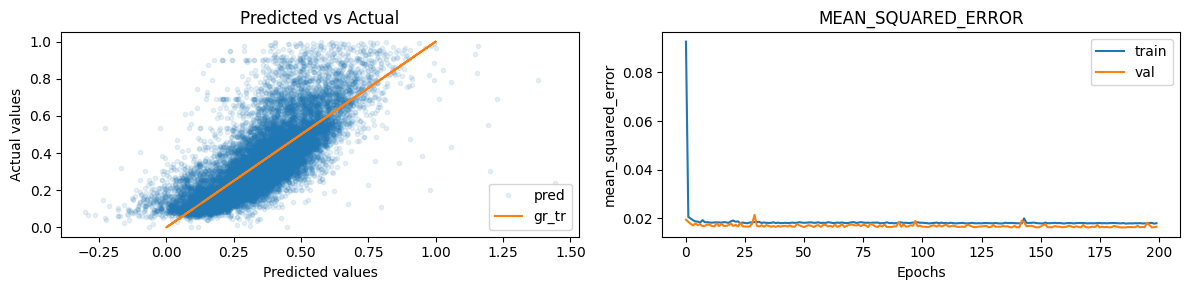

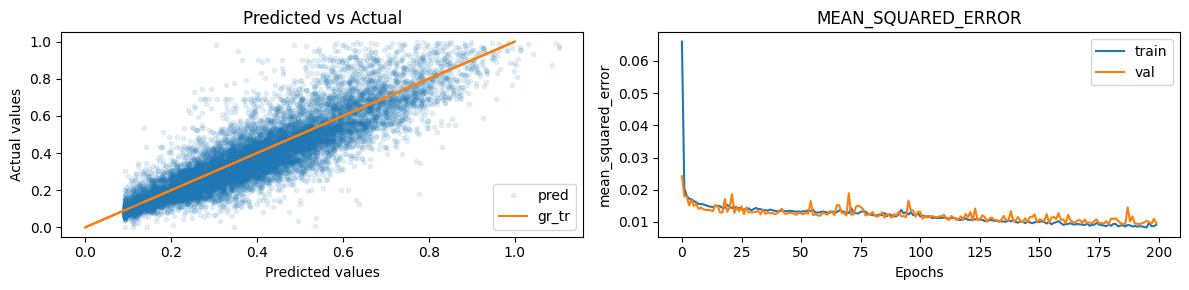

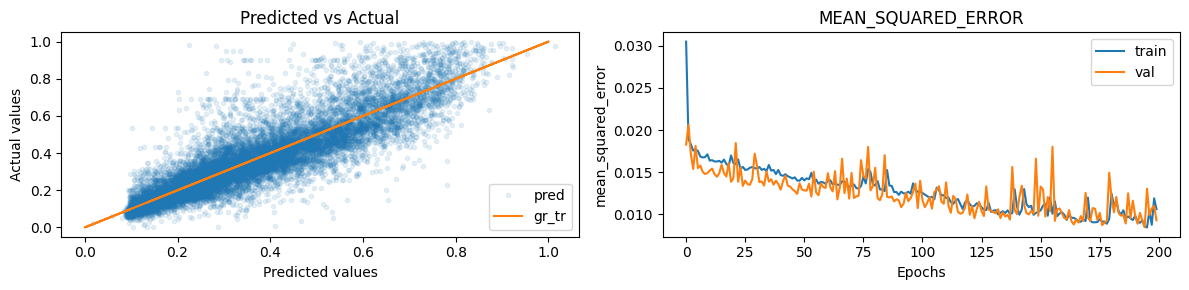

In [30]:
evaluate_architecture(l4, activation_functions, 200, error_functions, [x_train_n, y_train_n], 'experiment_size_{}'.format(l4), load_from_file)

In [31]:
from latex_export_functions import create_latex_table_from_json_layer_sizes

create_latex_table_from_json_layer_sizes('experiment_size_{}'.format(l1))
create_latex_table_from_json_layer_sizes('experiment_size_{}'.format(l2))
create_latex_table_from_json_layer_sizes('experiment_size_{}'.format(l3))
create_latex_table_from_json_layer_sizes('experiment_size_{}'.format(l4))

### Optimizer Evaluation

In [32]:
initial_learning_rates = [0.1, 0.01, 0.001]
decay_rates = [1, 0.96, 0.1]
num_epochs = 100
load_from_file = True

In [33]:
num_samples = len(x_train_n) * 0.8
batch_size = 128
number_of_steps_per_epoch = num_samples / batch_size
print('Number of steps per epoch', number_of_steps_per_epoch)

Number of steps per epoch 92.05625


In [34]:
import json
from tensorflow.keras.optimizers import Adam, SGD

def evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, optimizer_name, num_epochs, dataset, file_name, load_from_file):

    x_train_n, y_train_n  = dataset 
    layer_sizes = [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]
    activation_function = 'relu'
    loss_function = 'mean_squared_error'
    table = {}

    for initial_learning_rate in initial_learning_rates:
        learning_rate_table = {}
        for decay_rate in decay_rates:
            print('INITIAL LEARNING RATE: ', initial_learning_rate)
            print('DECAY RATE: ', decay_rate)
            model_name = "{}_{}_{}".format(optimizer_name, initial_learning_rate, decay_rate)
            lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=10000,
                decay_rate=decay_rate)
            optimizer = None 
            if optimizer_name == 'Adam':
                optimizer = Adam(learning_rate=lr_schedule)
            elif optimizer_name == 'SGD':
                optimizer = SGD(learning_rate=lr_schedule)
            elif optimizer_name == 'SGDM_Small':
                optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)
            elif optimizer_name == 'SGDM_Large':
                optimizer = SGD(learning_rate=lr_schedule, momentum=0.99)
            else:
                raise TypeError("WE SHOULDN'T END HERE")

            m, h= create_and_train_model(layer_sizes, activation_function, num_epochs, optimizer, loss_function, error_functions, model_name, dataset, load_from_file)
            labels_predicted = m.predict(x_train_n)
            visualize_and_plot(labels_predicted, y_train_n, error_functions, h, model_name)
            metric_table = evaluate_model_on_final_epoch(h)

            learning_rate_table[decay_rate] = metric_table
        table[initial_learning_rate] = learning_rate_table
        


    with open('json_outputs\\{}.json'.format(file_name), 'w') as file:
        json.dump(table, file, indent=4)

        

INITIAL LEARNING RATE:  0.1
DECAY RATE:  1


Model and history loaded from 'Adam_0.1_1'
{'loss': [4128.79541015625, 0.04173349216580391, 0.04187082499265671, 0.04094652086496353, 0.042293306440114975, 0.04139304161071777, 0.041943926364183426, 0.041236456483602524, 0.04259933903813362, 0.04167870804667473, 0.04163515195250511, 0.042678553611040115, 0.04112771153450012, 0.04118955507874489, 0.04250199720263481, 0.04270702973008156, 0.04117795452475548, 0.042389191687107086, 0.04115504398941994, 0.04149811714887619, 0.0417402945458889, 0.04124912992119789, 0.0416082888841629, 0.04114007204771042, 0.04189421609044075, 0.041270460933446884, 0.04126771539449692, 0.041439756751060486, 0.04158570617437363, 0.04126139357686043, 0.04122988134622574, 0.04201003536581993, 0.042622391134500504, 0.041062988340854645, 0.0412888303399086, 0.042682062834501266, 0.04128904640674591, 0.041270069777965546, 0.041989538818597794, 0.04161566123366356, 0.04167823866009712, 0.04141358658671379, 0.041105542331933975, 0.041698094457387924, 0.0412152446806

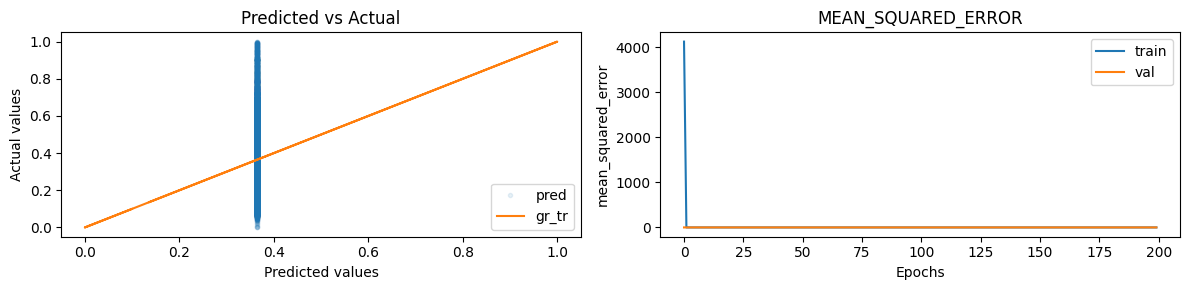

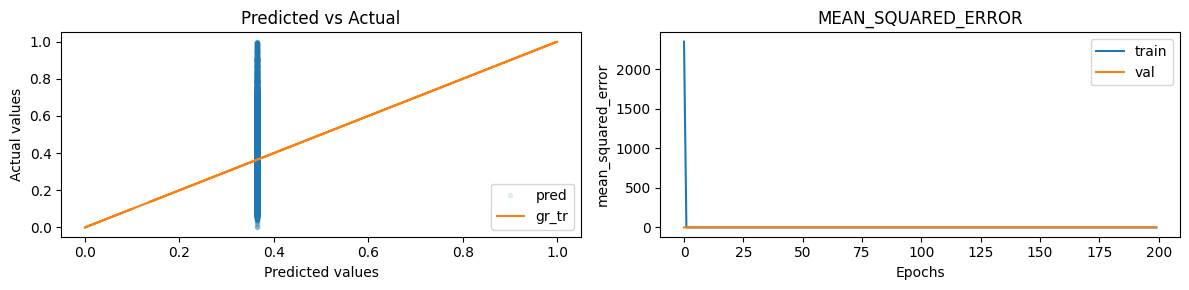

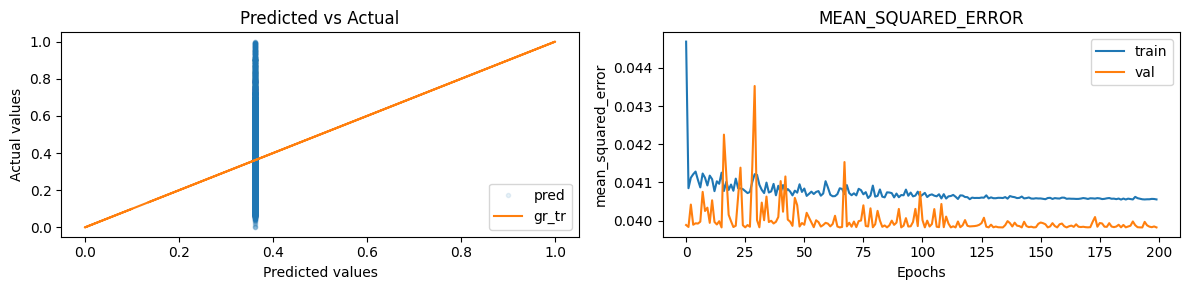

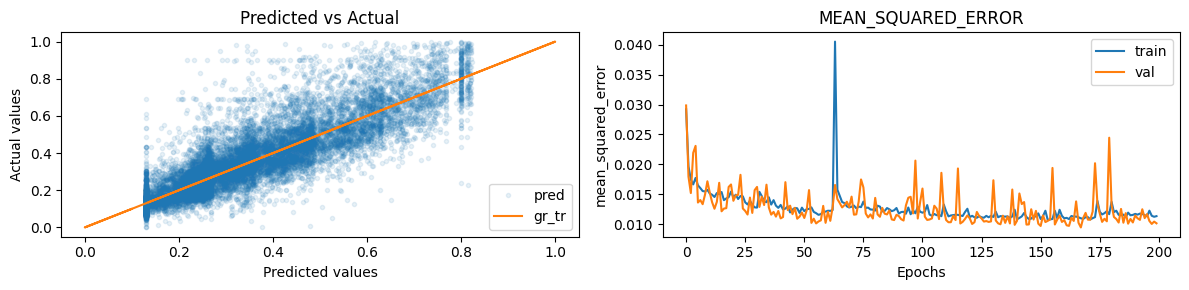

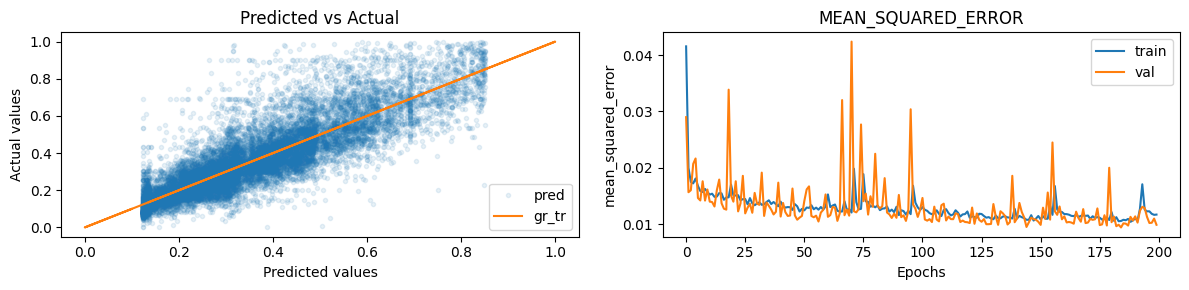

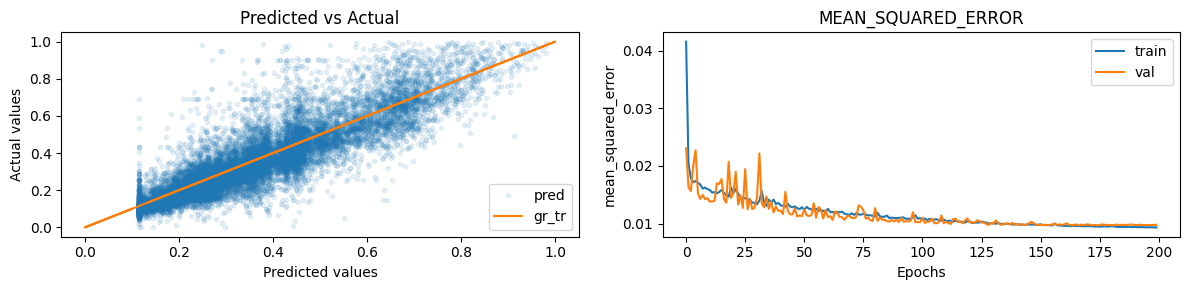

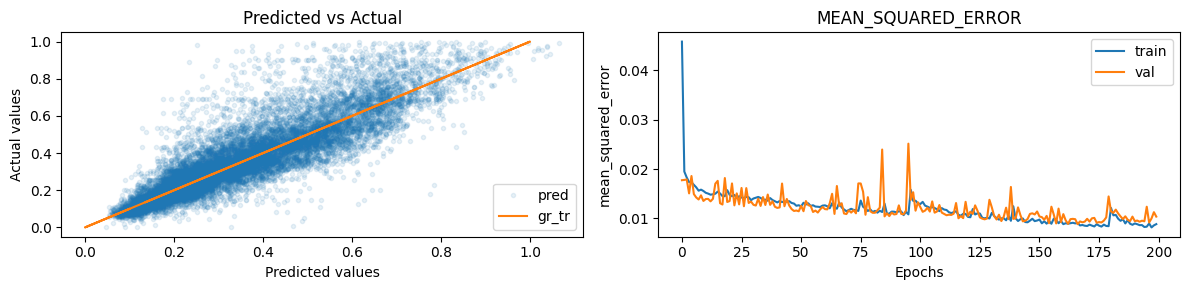

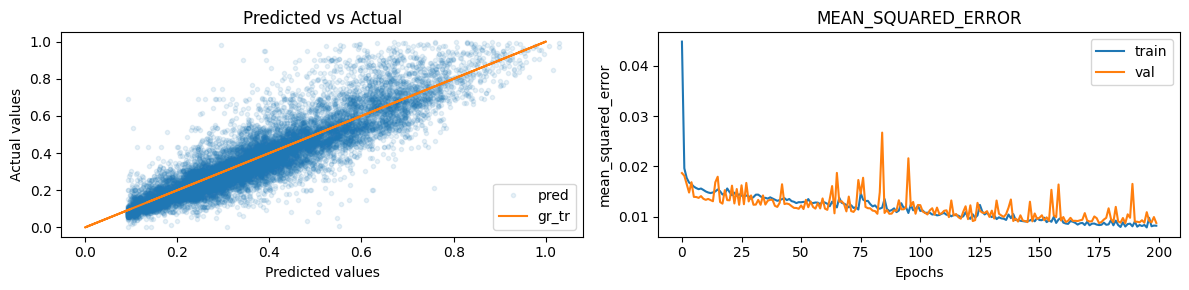

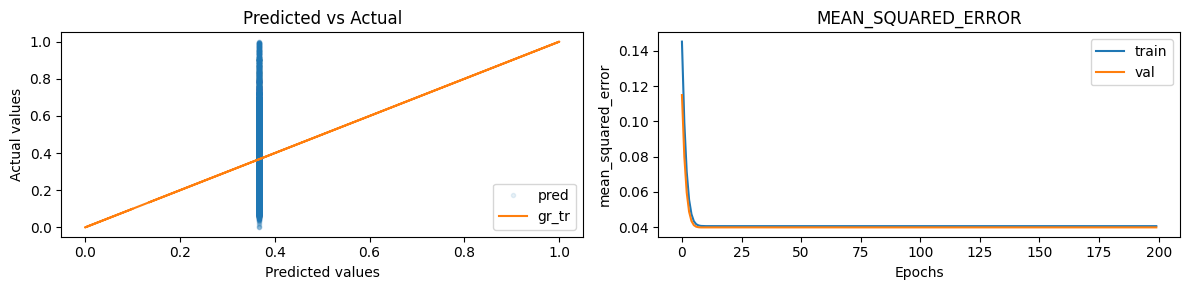

In [35]:
evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, 'Adam', 200, [x_train_n, y_train_n], 'adam_learning_rate_table', load_from_file)

INITIAL LEARNING RATE:  0.1
DECAY RATE:  1
Model and history loaded from 'SGD_0.1_1'
{'loss': [0.042779341340065, 0.03863207995891571, 0.03529835864901543, 0.03254087641835213, 0.028557581827044487, 0.026827536523342133, 0.024565674364566803, 0.02325492352247238, 0.02223793789744377, 0.02034597471356392, 0.02051166072487831, 0.02011621929705143, 0.020207716152071953, 0.019470378756523132, 0.01962847262620926, 0.019186142832040787, 0.018751690164208412, 0.019421972334384918, 0.018861806020140648, 0.018887365236878395, 0.01825760304927826, 0.01781124249100685, 0.01843445934355259, 0.01822817139327526, 0.018244648352265358, 0.0175334382802248, 0.017540689557790756, 0.017245957627892494, 0.01750740222632885, 0.017959367483854294, 0.01848660223186016, 0.016795998439192772, 0.017183706164360046, 0.017373869195580482, 0.017019620165228844, 0.017392290756106377, 0.017275357618927956, 0.016861647367477417, 0.01704559475183487, 0.016770895570516586, 0.016643844544887543, 0.016733789816498756, 0.

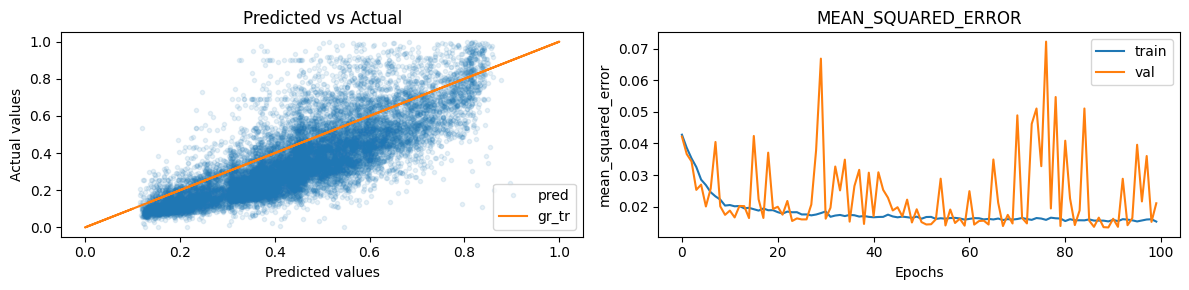

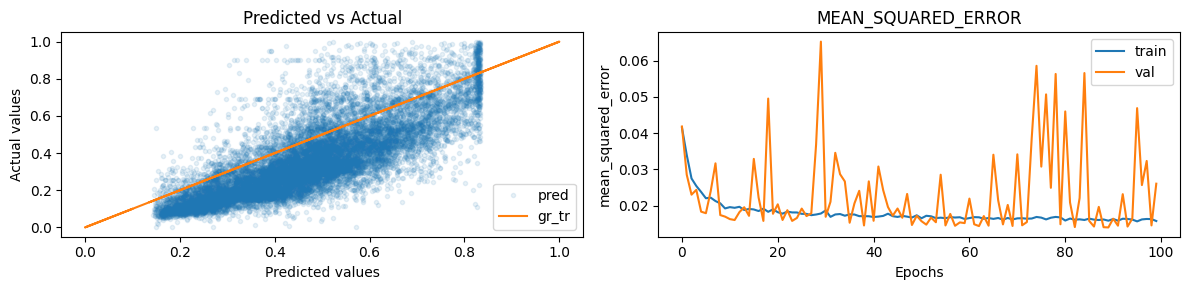

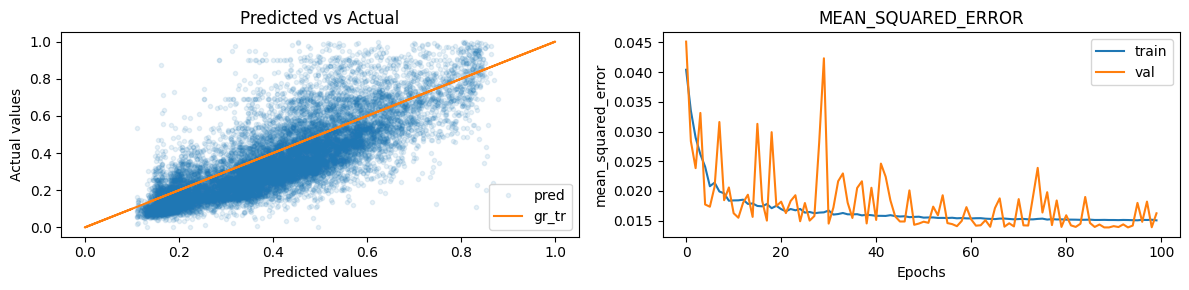

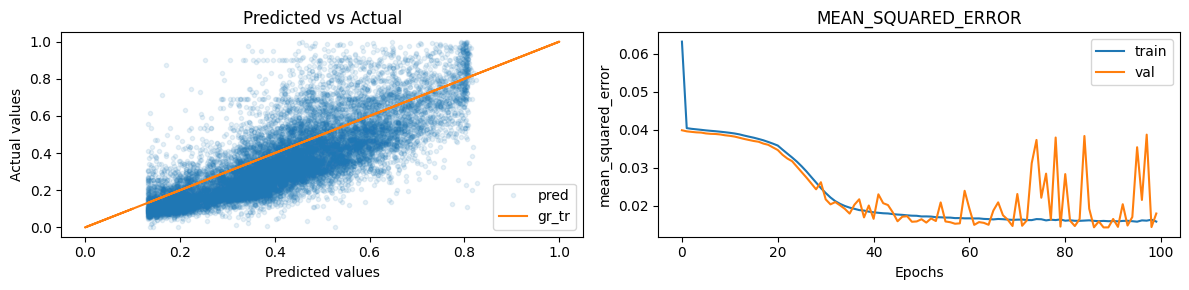

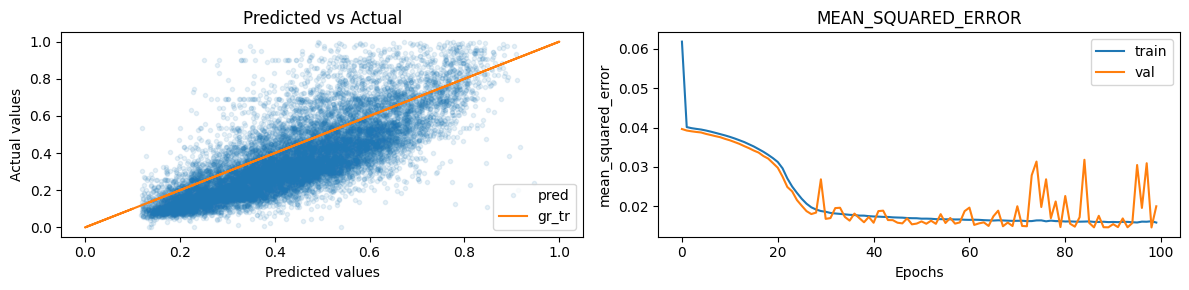

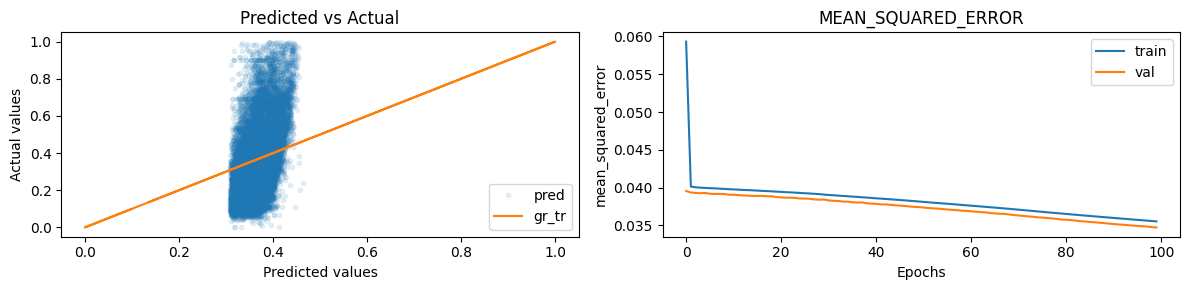

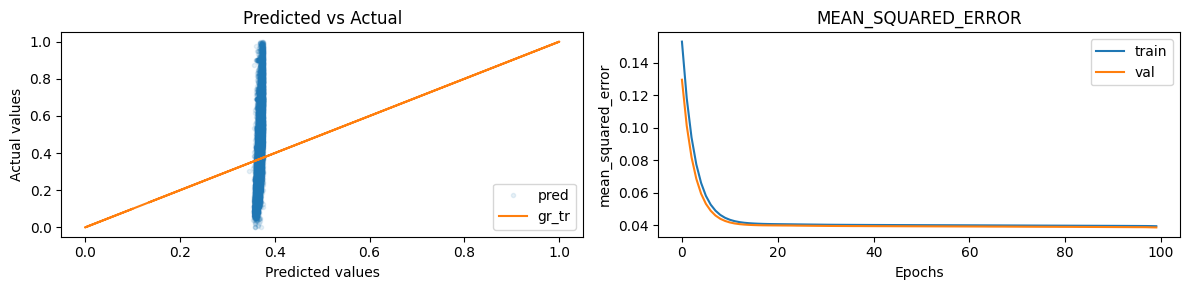

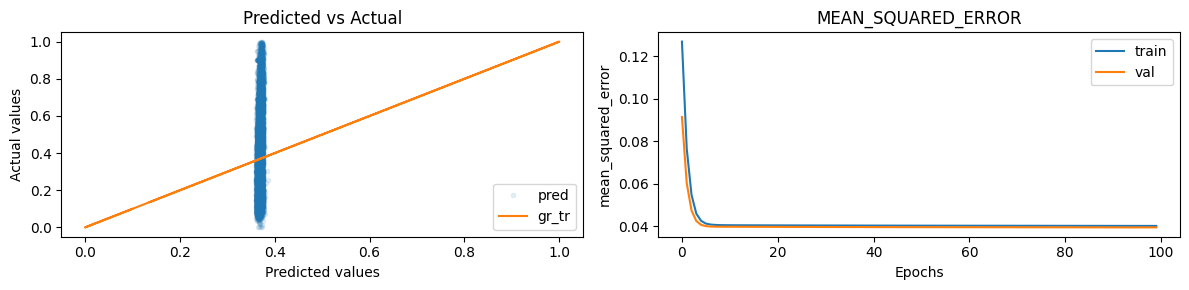

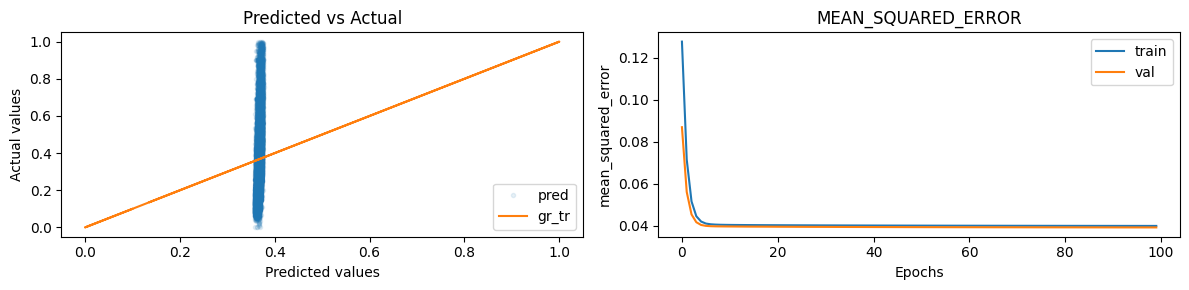

In [36]:
evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, 'SGD', 100, [x_train_n, y_train_n], 'sgd_learning_rate_table', load_from_file)

INITIAL LEARNING RATE:  0.1
DECAY RATE:  1
Model and history loaded from 'SGDM_Small_0.1_1'
{'loss': [0.04847370833158493, 0.04090644419193268, 0.04116750508546829, 0.04117944464087486, 0.04115112125873566, 0.04087621346116066, 0.04082290455698967, 0.04091997072100639, 0.04104357957839966, 0.04084935784339905, 0.04098489135503769, 0.04098450392484665, 0.04069530591368675, 0.040915850549936295, 0.040885020047426224, 0.04118942469358444, 0.04074912518262863, 0.04099239036440849, 0.04078378900885582, 0.04086517542600632, 0.040747083723545074, 0.041059672832489014, 0.04082498326897621, 0.04084468260407448, 0.040832556784152985, 0.04076465219259262, 0.040710873901844025, 0.040742166340351105, 0.040986839681863785, 0.04123441129922867, 0.041196178644895554, 0.04098133742809296, 0.04083770886063576, 0.04081499204039574, 0.041136108338832855, 0.04076496139168739, 0.04081743583083153, 0.041204940527677536, 0.04068514704704285, 0.040833570063114166, 0.040791161358356476, 0.041019681841135025, 0.

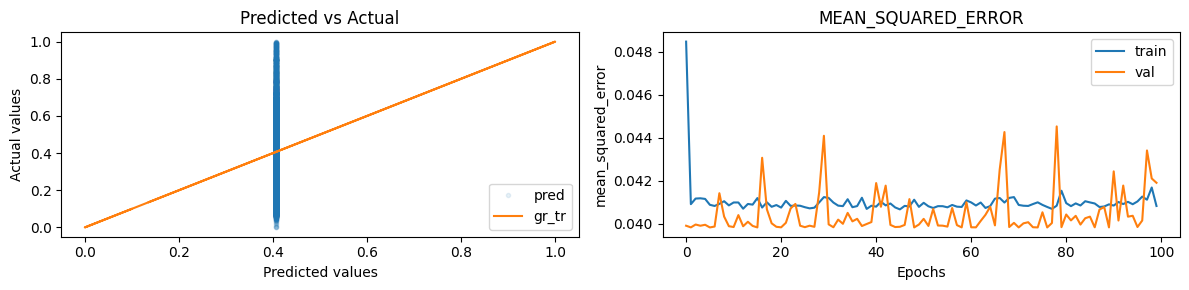

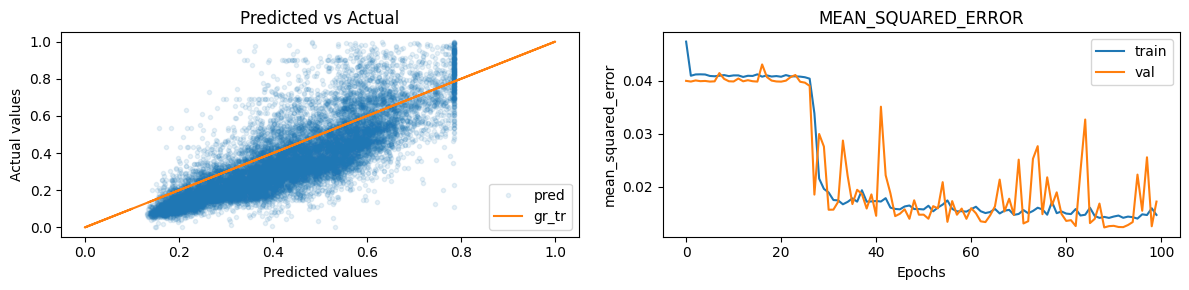

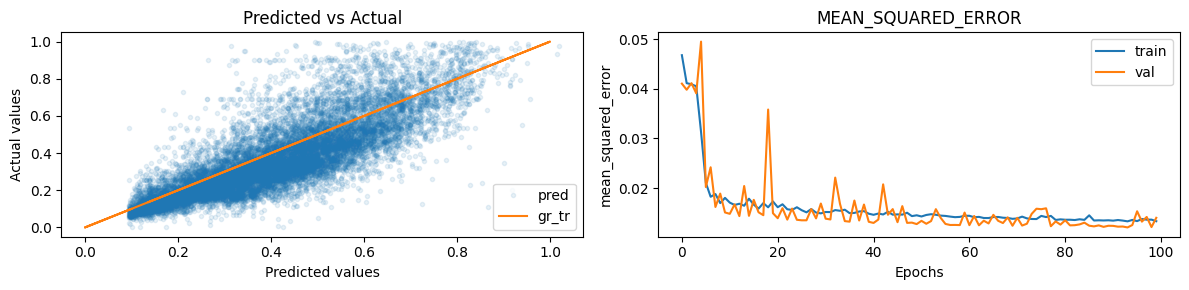

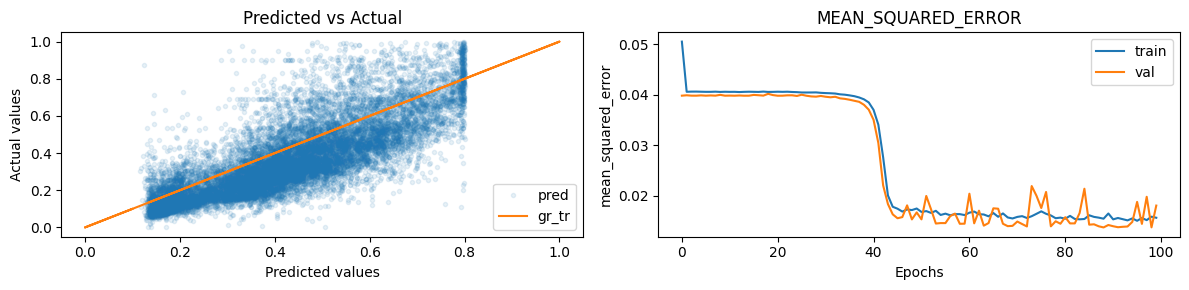

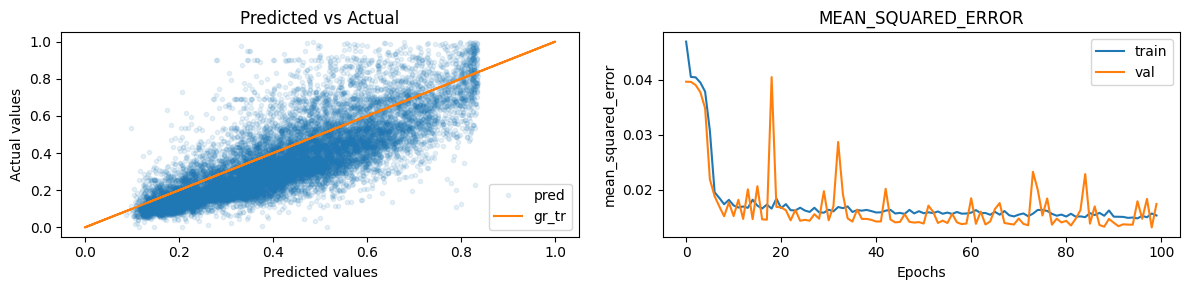

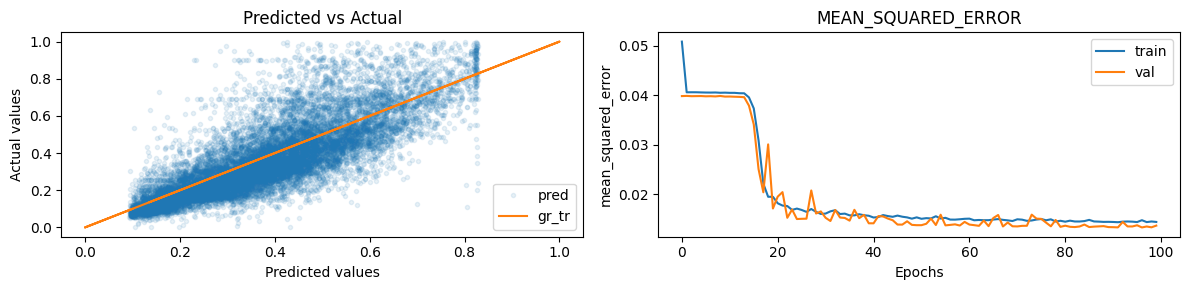

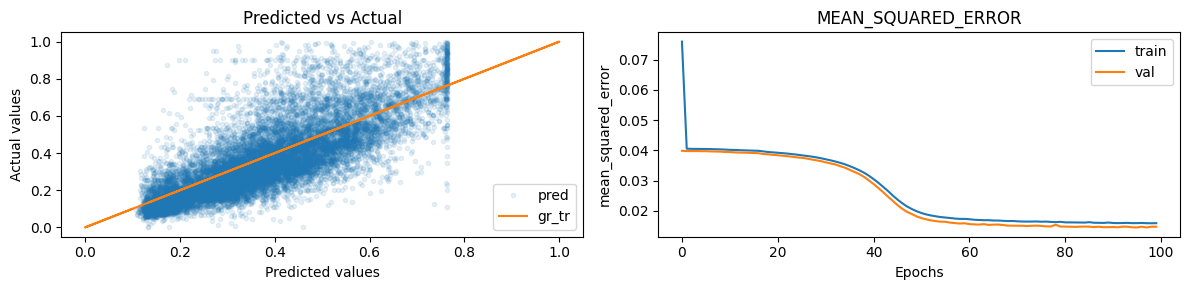

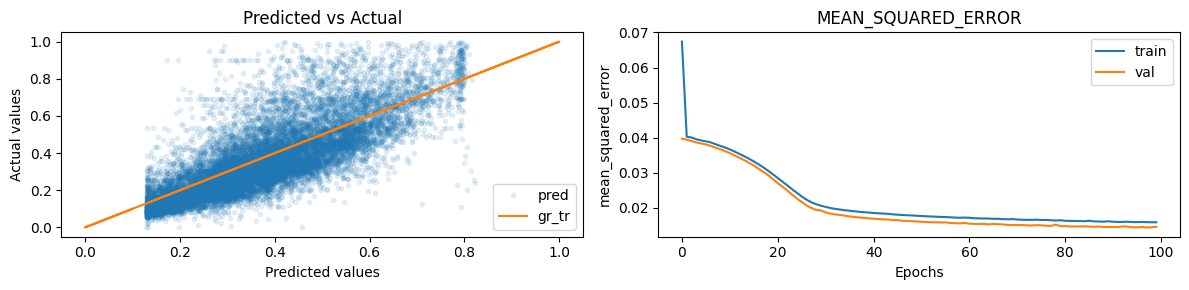

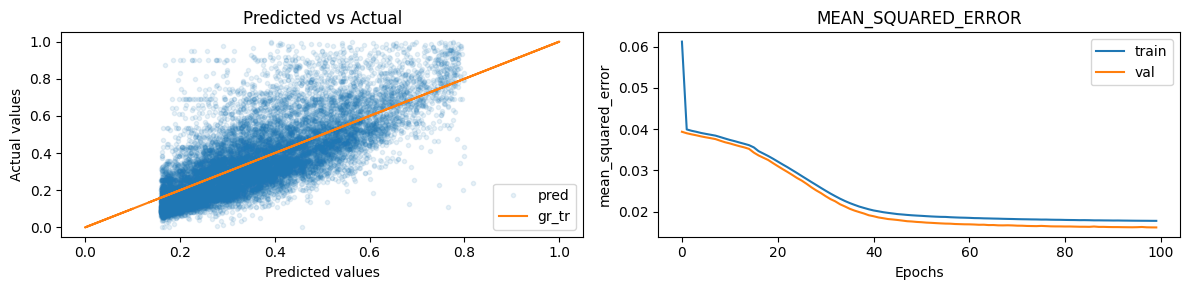

In [37]:
evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, 'SGDM_Small', 100, [x_train_n, y_train_n], 'sgd_small_learning_rate_table', load_from_file)

INITIAL LEARNING RATE:  0.1
DECAY RATE:  1
Model and history loaded from 'SGDM_Large_0.1_1'
{'loss': [0.05117686092853546, 0.045003604143857956, 0.04636441543698311, 0.05374123528599739, 0.05630992352962494, 0.049946241080760956, 0.04500022158026695, 0.04245422035455704, 0.04332171753048897, 0.04165791720151901, 0.04175242409110069, 0.042645953595638275, 0.042037539184093475, 0.04136735945940018, 0.042831018567085266, 0.043279990553855896, 0.04578276351094246, 0.04796949028968811, 0.0462360754609108, 0.041294969618320465, 0.041138049215078354, 0.04239789396524429, 0.044377651065588, 0.042284201830625534, 0.04516823962330818, 0.04374922066926956, 0.0420459508895874, 0.042781345546245575, 0.04345202445983887, 0.04789672791957855, 0.05214858055114746, 0.042457643896341324, 0.04172943904995918, 0.04115685820579529, 0.043150391429662704, 0.04348029941320419, 0.04308962821960449, 0.04487360268831253, 0.043671414256095886, 0.04367911443114281, 0.04434183984994888, 0.04870681092143059, 0.04460

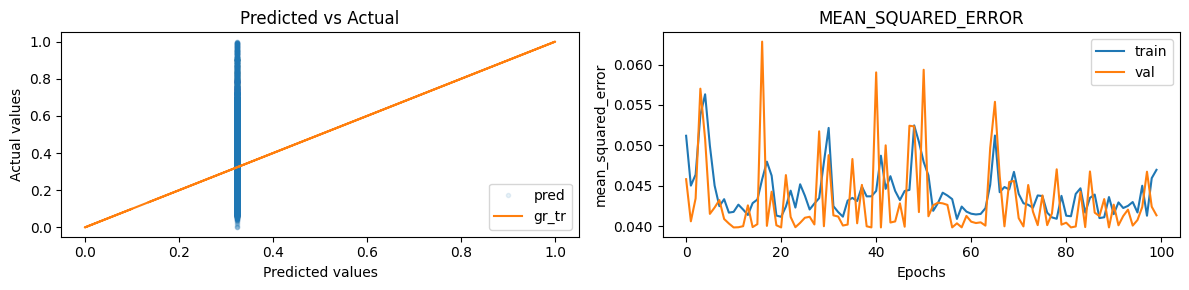

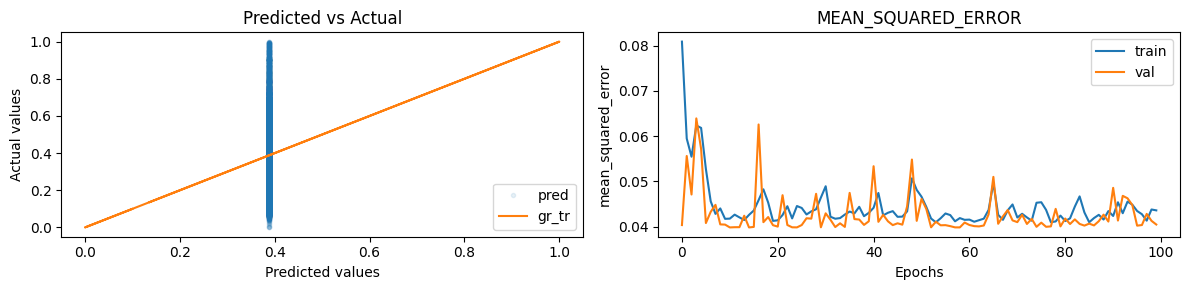

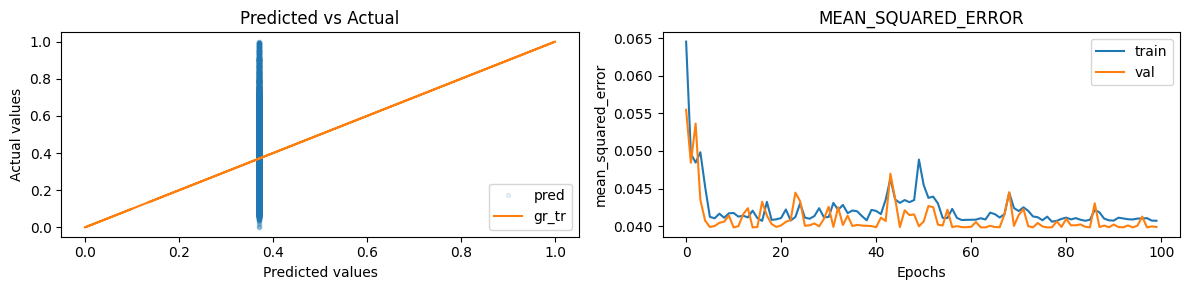

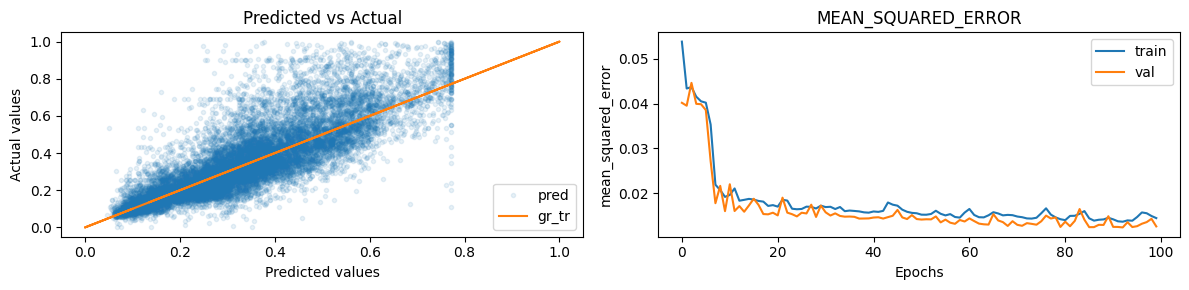

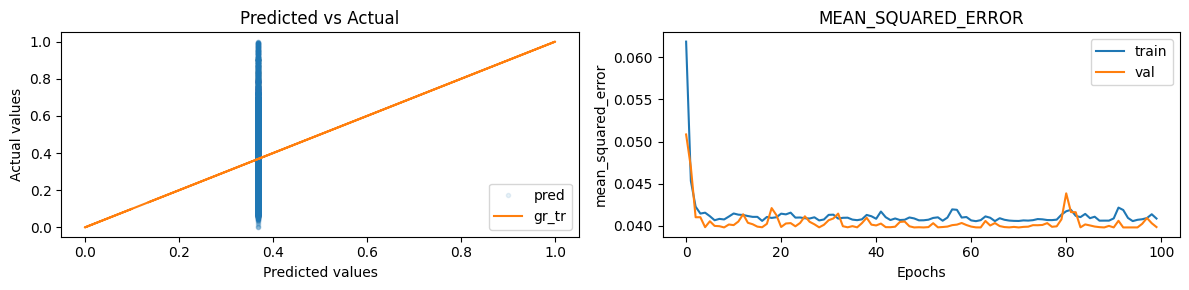

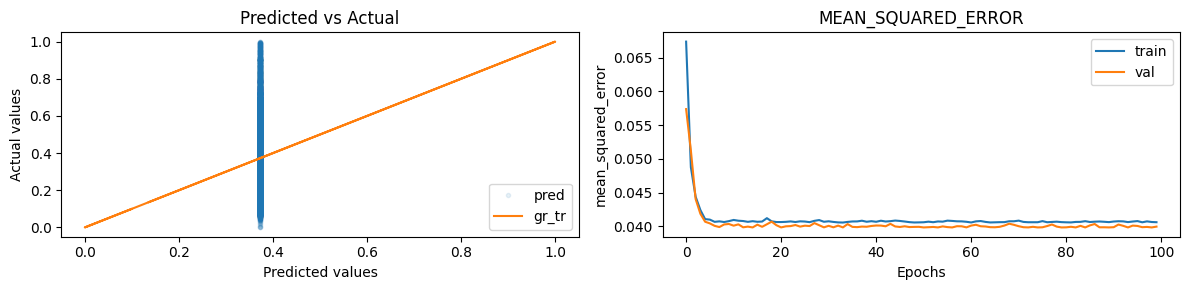

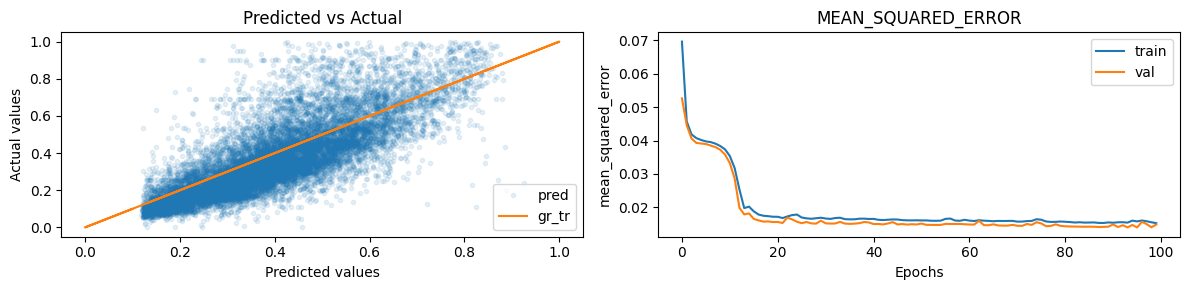

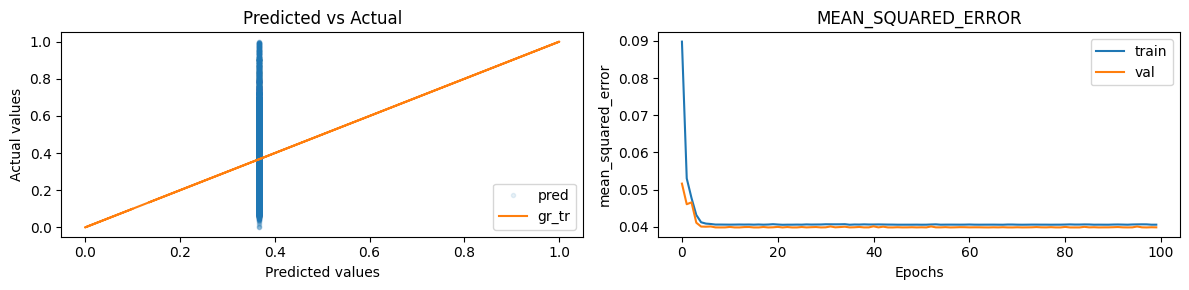

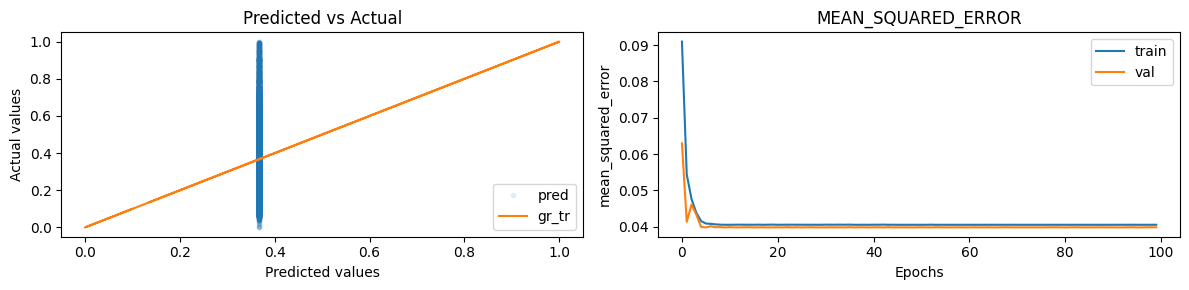

In [38]:
evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, 'SGDM_Large', 100, [x_train_n, y_train_n], 'sgd_large_learning_rate_table', load_from_file)

In [39]:
from latex_export_functions import save_latex_table_json_optimizer

save_latex_table_json_optimizer('adam_learning_rate_table')
save_latex_table_json_optimizer('sgd_learning_rate_table')
save_latex_table_json_optimizer('sgd_large_learning_rate_table')
save_latex_table_json_optimizer('sgd_small_learning_rate_table')

### Final Training and Plots

In [40]:
def create_and_train_final_model(*args):
    layer_sizes, activation_function, epochs, optimizer, loss_function, error_functions, model_name, dataset, load_from_file = args
    x_train_n, y_train_n = dataset

    model_file = '{}/{}.h5'.format('saved_models', model_name)
    history_file = '{}/{}_history.pkl'.format('saved_models', model_name)
    
    model = initialize_sequential_model(layer_sizes, activation_function)

    if load_from_file and os.path.exists(model_file) and os.path.exists(history_file):
        model = load_model(model_file)
        with open(history_file, 'rb') as file:
            history = pickle.load(file)
        print(f"Model and history loaded from '{model_name}'")
        print(history)
    else:
        model.compile(loss=loss_function, 
                    optimizer= optimizer,
                    metrics= error_functions
                    )
        history = model.fit(x_train_n[:,:], #training data
                        y_train_n[:],  #Labels
                        epochs=epochs,
                        batch_size=128,
                        verbose=0,
                        validation_split = 0
                    ).history
        print(f"New model created and trained: {model_file}")

        model.save(model_file)
        with open(history_file, 'wb') as file:
            pickle.dump(history, file)
        print(f"Model and history saved as '{model_file}'")  

    return model, history




def evaluate_full_dataset_architecture(layers, activation_function, optimizer, num_epochs, loss_function, dataset, test_set, file_name, load_from_file):
    x_train_n, y_train_n  = dataset 
    x_test_n, y_test_n = test_set
    model_name = 'final_model'
    error_functions = ['mean_squared_error', 'mean_absolute_error']
    m_train, h_train= create_and_train_final_model(layers, activation_function, num_epochs, optimizer, loss_function, error_functions, model_name, dataset, load_from_file)
    labels_predicted_train = m_train.predict(x_train_n)
    m_test, h_test= create_and_train_final_model(layers, activation_function, num_epochs, optimizer, loss_function, error_functions, model_name, test_set, True)
    labels_predicted_test = m_train.predict(x_test_n)

    visualize_and_plot(labels_predicted_train, y_train_n, loss_function, h_train, f'{model_name}_training_set')
    table_training = evaluate_model_on_final_epoch(h_train)

    visualize_and_plot(labels_predicted_test, y_test_n, loss_function, h_test, f'{model_name}_test_set')
    table_test = evaluate_model_on_final_epoch(h_test)


    with open('json_outputs\\{}-{}.json'.format(file_name, 'training_set'), 'w') as file:
        json.dump(table_training, file, indent=4)
    with open('json_outputs\\{}-{}.json'.format(file_name, 'test_set'), 'w') as file:
        json.dump(table_test, file, indent=4)

    # Plot predicted vs actual values

    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(labels_predicted_train, y_train_n, '.', alpha=0.1)
    ax[0].plot(y_train_n, y_train_n)
    ax[0].set_title('Training Set')
    ax[0].set_xlabel('Predicted values')
    ax[0].set_ylabel('Actual values')
    ax[0].legend(['pred', 'gr_tr'], loc='lower right')

    ax[1].plot(labels_predicted_test, y_test_n, '.', alpha=0.1)
    ax[1].plot(y_test_n, y_test_n)
    ax[1].set_title('Test Set')
    ax[1].set_xlabel('Predicted values')
    ax[1].set_ylabel('Actual values')
    ax[1].legend(['pred', 'gr_tr'], loc='lower right')


    plt.savefig(f'figures\\{file_name}.png')


        

New model created and trained: saved_models/final_model.h5
Model and history saved as 'saved_models/final_model.h5'
 28/461 [>.............................] - ETA: 0s 

c:\Users\vdako\anaconda3\envs\sam-model-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


461/461 [==============================] - 1s 2ms/step
Model and history loaded from 'final_model'
{'loss': [0.04433143138885498, 0.018781930208206177, 0.017494605854153633, 0.016967643052339554, 0.016508765518665314, 0.016170116141438484, 0.015611625276505947, 0.015214947052299976, 0.015043884515762329, 0.014919932931661606, 0.014483076520264149, 0.014717658050358295, 0.014683101326227188, 0.014297815971076488, 0.014375559985637665, 0.014329011552035809, 0.013925738632678986, 0.013824991881847382, 0.01411697082221508, 0.013725786469876766, 0.013687149621546268, 0.013770928606390953, 0.013793040998280048, 0.013528355397284031, 0.01380736194550991, 0.01336662657558918, 0.013258847407996655, 0.013159585185348988, 0.013379136100411415, 0.013511912897229195, 0.013113651424646378, 0.01299496553838253, 0.013438958674669266, 0.012818395160138607, 0.01432432234287262, 0.013085168786346912, 0.013010095804929733, 0.012845754623413086, 0.012644044123589993, 0.012679995968937874, 0.012649145908653

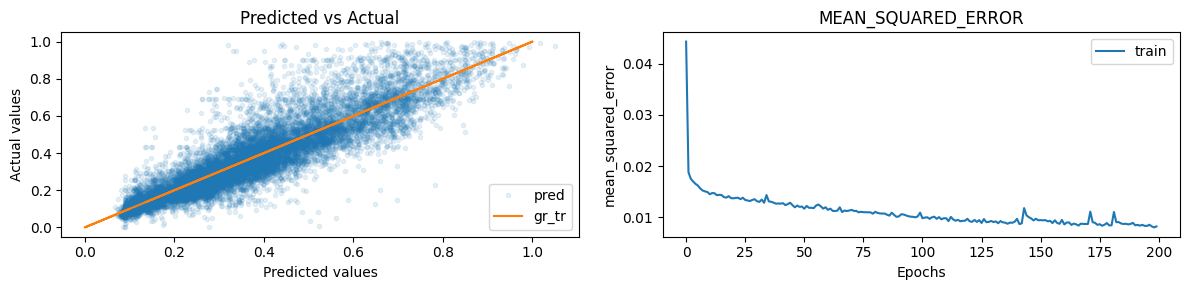

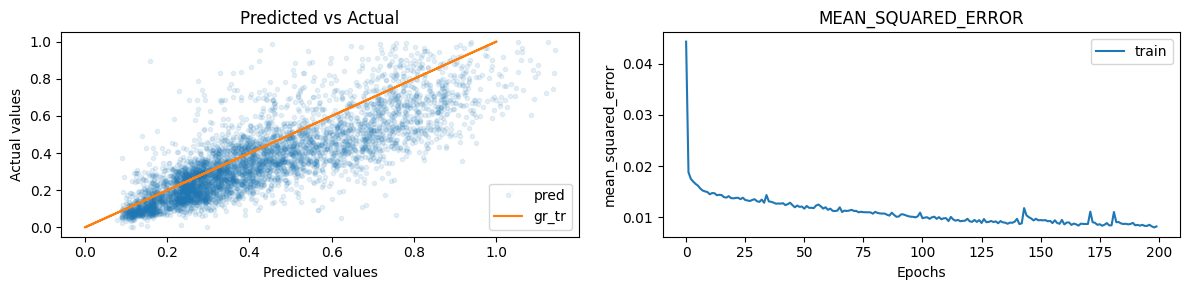

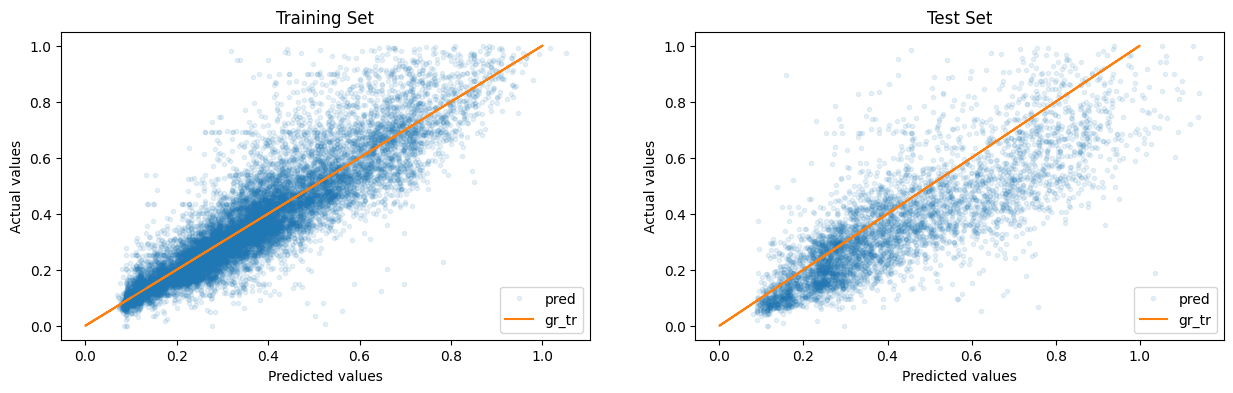

In [42]:
num_epochs = 200
layers = [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]
activation_function = 'relu'
loss_function = 'mean_squared_error'  
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=0.001,
                decay_steps=10000,
                decay_rate= 0.96) 
optimizer = Adam(learning_rate=lr_schedule)
load_from_file = False
evaluate_full_dataset_architecture(layers, activation_function, optimizer, 200, loss_function, 
                                   [x_train_n, y_train_n], [x_test_n, y_test_n], 'final_training', load_from_file)


In [43]:
from latex_export_functions import create_latex_table_from_json_final_training

create_latex_table_from_json_final_training('final_training-training_set', 'final_training-test_set')

### Change to Classification Neural Network

In [44]:
indices_to_remove_train = np.where(y_train >= 5)[0]
indices_to_remove_test = np.where(y_test >= 5)[0]

x_train_no_5s = np.delete(x_train, indices_to_remove_train, axis=0)
y_train_no_5s = np.delete(y_train, indices_to_remove_train)
x_test_no_5s = np.delete(x_test, indices_to_remove_test, axis=0)
y_test_no_5s = np.delete(y_test, indices_to_remove_test)

x_train_classification = normalize(x_train_no_5s)
x_test_classification = normalize(x_test_no_5s)

y_train_no_5s[y_train_no_5s < 2] = 0
y_train_no_5s[y_train_no_5s >= 2] = 1

y_test_no_5s[y_test_no_5s < 2] = 0
y_test_no_5s[y_test_no_5s >= 2] = 1

y_train_classification = y_train_no_5s
y_test_classification = y_test_no_5s

dataset_classification_train = [x_train_classification, y_train_classification]

In [45]:
def visualize_and_plot_classification(history, test_set, save_filename):
    """ 
    Function to visualize the predicted regression values vs the actual ones
    and plot the error on each epoch in a single plot.
    """

    error = 'binary_accuracy';
    plt.plot(history[error])
    if not test_set:
        plt.plot(history['val_{}'.format(error)])

    plt.title(error.upper())
    plt.ylabel(error)
    plt.xlabel('Epochs')
    plt.legend(['train', 'val'], loc='upper right')

    plt.tight_layout()
    plt.savefig(f'figures\\{save_filename}.png')
    plt.show()

In [46]:
def create_and_train_classification_model(*args):
    layer_sizes, activation_function, epochs, optimizer, loss_function, output_function, model_name, dataset, validation_split, load_from_file = args
    x_train_n, y_train_n = dataset

    model_file = '{}/{}.h5'.format('saved_models', model_name)
    history_file = '{}/{}_history.pkl'.format('saved_models', model_name)
    
    model = initialize_sequential_model(layer_sizes, activation_function)
    model.add(Dense(1, activation=output_function))

    if load_from_file and os.path.exists(model_file) and os.path.exists(history_file):
        model = load_model(model_file)
        with open(history_file, 'rb') as file:
            history = pickle.load(file)
        print(f"Model and history loaded from '{model_name}'")
        print(history)
    else:
        model.compile(loss=loss_function, 
                    optimizer= optimizer,
                    metrics= ['binary_accuracy']
                    )
        history = model.fit(x_train_n[:,:], #training data
                        y_train_n[:],  #Labels
                        epochs=epochs,
                        batch_size=128,
                        verbose=0,
                        validation_split = validation_split
                    ).history
        print(f"New model created and trained: {model_file}")

        model.save(model_file)
        with open(history_file, 'wb') as file:
            pickle.dump(history, file)
        print(f"Model and history saved as '{model_file}'")  

    return model, history




def evaluate_classification_dataset_architecture(layers, activation_function, optimizer, num_epochs, loss_function, output_function, dataset, validation_split, file_name, load_from_file):
    model_name = file_name
    m, h= create_and_train_classification_model(
        layers, activation_function, num_epochs, optimizer, loss_function, output_function, 
        model_name, dataset, validation_split, load_from_file)
    
    visualize_and_plot_classification(h, validation_split == 0, model_name)
    table = evaluate_model_on_final_epoch(h)

    with open('json_outputs\\{}.json'.format(file_name), 'w') as file:
        json.dump(table, file, indent=4)

    return m, h

Model and history loaded from 'classificaiton_retraining_200'
{'loss': [0.5519482493400574, 0.43547070026397705, 0.42716795206069946, 0.4209458827972412, 0.41815581917762756, 0.4128793478012085, 0.4073655605316162, 0.41382256150245667, 0.40493330359458923, 0.4039008915424347, 0.3967776298522949, 0.3969968557357788, 0.39331328868865967, 0.39992833137512207, 0.3932393193244934, 0.38906773924827576, 0.386941522359848, 0.38655608892440796, 0.3845759630203247, 0.3879491686820984, 0.3872000575065613, 0.38449332118034363, 0.3846876323223114, 0.3810109496116638, 0.3947546184062958, 0.37574461102485657, 0.37218141555786133, 0.3770287036895752, 0.37449634075164795, 0.3690569996833801, 0.3734959661960602, 0.37527135014533997, 0.3800843060016632, 0.36861103773117065, 0.37060999870300293, 0.3859999477863312, 0.37471652030944824, 0.36838245391845703, 0.3652900755405426, 0.37650400400161743, 0.36604154109954834, 0.3663485050201416, 0.3618759214878082, 0.36515337228775024, 0.36510592699050903, 0.36740

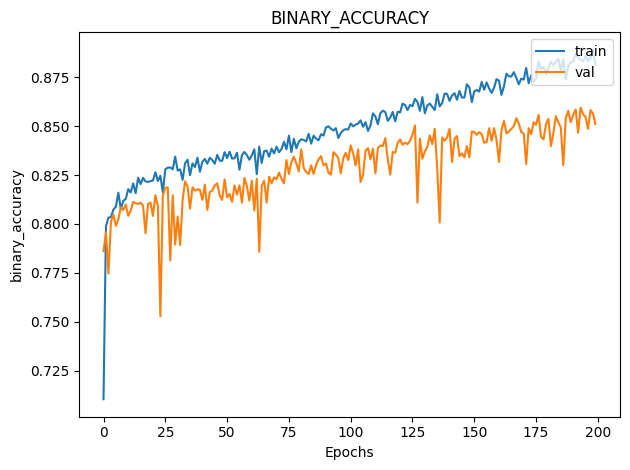

{'LOSS': 0.26290881633758545, 'BINARY_ACCURACY': 0.8811847567558289, 'VAL_LOSS': 0.3863820731639862, 'VAL_BINARY_ACCURACY': 0.8509843945503235}


(<keras.src.engine.sequential.Sequential at 0x192cb515d90>,
 {'loss': [0.5519482493400574,
   0.43547070026397705,
   0.42716795206069946,
   0.4209458827972412,
   0.41815581917762756,
   0.4128793478012085,
   0.4073655605316162,
   0.41382256150245667,
   0.40493330359458923,
   0.4039008915424347,
   0.3967776298522949,
   0.3969968557357788,
   0.39331328868865967,
   0.39992833137512207,
   0.3932393193244934,
   0.38906773924827576,
   0.386941522359848,
   0.38655608892440796,
   0.3845759630203247,
   0.3879491686820984,
   0.3872000575065613,
   0.38449332118034363,
   0.3846876323223114,
   0.3810109496116638,
   0.3947546184062958,
   0.37574461102485657,
   0.37218141555786133,
   0.3770287036895752,
   0.37449634075164795,
   0.3690569996833801,
   0.3734959661960602,
   0.37527135014533997,
   0.3800843060016632,
   0.36861103773117065,
   0.37060999870300293,
   0.3859999477863312,
   0.37471652030944824,
   0.36838245391845703,
   0.3652900755405426,
   0.3765040040016

In [47]:
num_epochs = 200
layers = [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4]
activation_function = 'relu'
loss_function = 'binary_crossentropy'
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=0.001,
                decay_steps=10000,
                decay_rate= 0.96) 
optimizer=Adam(learning_rate=lr_schedule)
load_from_file = True


evaluate_classification_dataset_architecture(layers, activation_function, optimizer, num_epochs, loss_function, 'sigmoid', 
                                             dataset_classification_train, 0.2, 'classificaiton_retraining_200', load_from_file )


In [48]:
from latex_export_functions import create_latex_table_for_classification_validation

create_latex_table_for_classification_validation('classificaiton_retraining_200')
create_latex_table_for_classification_validation('classificaiton_retraining_100')

Model and history loaded from 'classificaiton_retraining_100'
{'loss': [0.5930512547492981, 0.5066206455230713, 0.4929927587509155, 0.4814502000808716, 0.47145965695381165, 0.4662119448184967, 0.4553249776363373, 0.46047481894493103, 0.4466566741466522, 0.4419640302658081, 0.43821072578430176, 0.42990177869796753, 0.42743194103240967, 0.4308856427669525, 0.4281255602836609, 0.41650083661079407, 0.415022611618042, 0.41298797726631165, 0.4086364507675171, 0.4138343632221222, 0.4109744429588318, 0.40131711959838867, 0.4055034816265106, 0.4019816219806671, 0.4176178276538849, 0.3977501094341278, 0.3968008756637573, 0.39539864659309387, 0.39290863275527954, 0.3886570334434509, 0.39299309253692627, 0.39114320278167725, 0.39188021421432495, 0.3833886682987213, 0.38637596368789673, 0.3851407766342163, 0.3935328423976898, 0.3807559311389923, 0.37784668803215027, 0.38109856843948364, 0.3788265287876129, 0.37656915187835693, 0.3758942186832428, 0.3750029504299164, 0.38171789050102234, 0.377731204

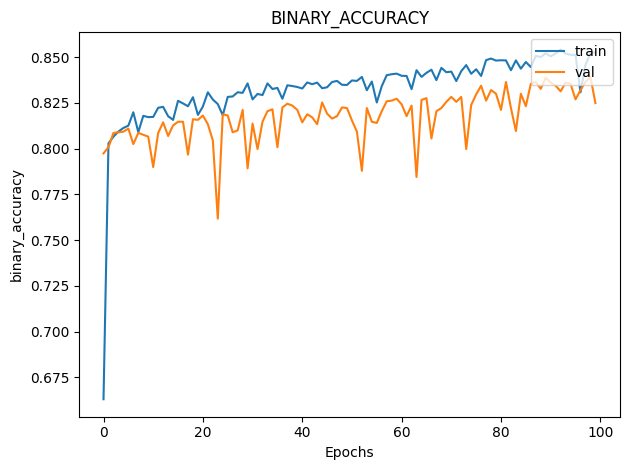

{'LOSS': 0.33107122778892517, 'BINARY_ACCURACY': 0.8526691198348999, 'VAL_LOSS': 0.36309781670570374, 'VAL_BINARY_ACCURACY': 0.8248472213745117}


(<keras.src.engine.sequential.Sequential at 0x192c9f0cd60>,
 {'loss': [0.5930512547492981,
   0.5066206455230713,
   0.4929927587509155,
   0.4814502000808716,
   0.47145965695381165,
   0.4662119448184967,
   0.4553249776363373,
   0.46047481894493103,
   0.4466566741466522,
   0.4419640302658081,
   0.43821072578430176,
   0.42990177869796753,
   0.42743194103240967,
   0.4308856427669525,
   0.4281255602836609,
   0.41650083661079407,
   0.415022611618042,
   0.41298797726631165,
   0.4086364507675171,
   0.4138343632221222,
   0.4109744429588318,
   0.40131711959838867,
   0.4055034816265106,
   0.4019816219806671,
   0.4176178276538849,
   0.3977501094341278,
   0.3968008756637573,
   0.39539864659309387,
   0.39290863275527954,
   0.3886570334434509,
   0.39299309253692627,
   0.39114320278167725,
   0.39188021421432495,
   0.3833886682987213,
   0.38637596368789673,
   0.3851407766342163,
   0.3935328423976898,
   0.3807559311389923,
   0.37784668803215027,
   0.3810985684394836

In [49]:
optimizer=Adam(learning_rate=lr_schedule)
evaluate_classification_dataset_architecture(layers, activation_function, optimizer, 100, loss_function, 'sigmoid', 
                                             dataset_classification_train, 0.2, 'classificaiton_retraining_100', load_from_file )


Model and history loaded from 'classification_training_no_validation_set'
{'loss': [0.5823264122009277, 0.43483325839042664, 0.42150619626045227, 0.4126121401786804, 0.4094279408454895, 0.40985384583473206, 0.4058549702167511, 0.4016692638397217, 0.40014350414276123, 0.4012688398361206, 0.39586886763572693, 0.3971300721168518, 0.39011484384536743, 0.38761183619499207, 0.3906404376029968, 0.3942103683948517, 0.38071781396865845, 0.3811665177345276, 0.37959709763526917, 0.37794291973114014, 0.37783804535865784, 0.3757837116718292, 0.3727366030216217, 0.3742874264717102, 0.3798922598361969, 0.37623926997184753, 0.3682371973991394, 0.3689016103744507, 0.36643990874290466, 0.36446407437324524, 0.36769694089889526, 0.36495211720466614, 0.37393710017204285, 0.3664560914039612, 0.3616587519645691, 0.3608226478099823, 0.35509681701660156, 0.36159583926200867, 0.357496976852417, 0.3531244695186615, 0.35559558868408203, 0.3510020673274994, 0.35181304812431335, 0.3511694669723511, 0.34726735949516

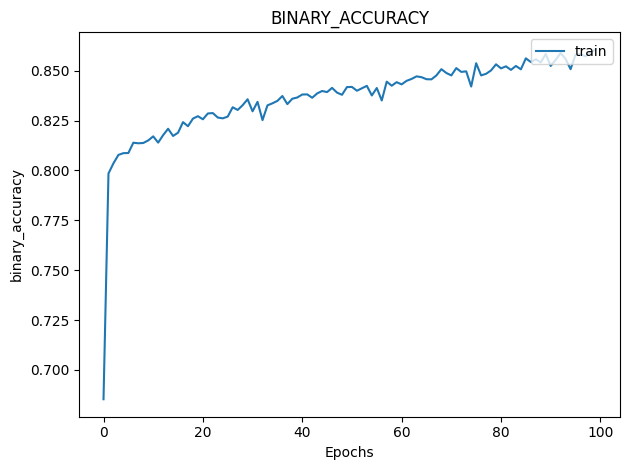

{'LOSS': 0.3019735813140869, 'BINARY_ACCURACY': 0.8606151342391968}


In [50]:
optimizer=Adam(learning_rate=lr_schedule)
classification_model, classification_history = evaluate_classification_dataset_architecture(layers, 'relu', optimizer, 100, loss_function, 'sigmoid', 
                                             dataset_classification_train, 0, 'classification_training_no_validation_set', load_from_file )

In [51]:
loss_train, accuracy_train = classification_model.evaluate(x_train_classification, y_train_classification)
print(f'Binary Crossentropy Loss on Training Set: {loss_train}')
print(f'Accuracy on Training Set: {accuracy_train}')

461/461 [==============================] - 1s 2ms/step - loss: 0.3330 - binary_accuracy: 0.8324
Binary Crossentropy Loss on Training Set: 0.3330177664756775
Accuracy on Training Set: 0.8324394226074219


In [52]:
loss_test, accuracy_test = classification_model.evaluate(x_test_classification, y_test_classification)
print(f'Binary Crossentropy Loss on Test Set: {loss_test}')
print(f'Accuracy on Test Set: {accuracy_test}')

154/154 [==============================] - 0s 3ms/step - loss: 0.4244 - binary_accuracy: 0.8333
Binary Crossentropy Loss on Test Set: 0.4244282841682434
Accuracy on Test Set: 0.833299458026886
